# Importando bibliotecas

In [5]:
import numpy as np         # para fazer contas e mexer com matrizes
import pandas as pd        # para montar DataFrames (tabelas de bancos de dados)

import matplotlib.pyplot as plt
import seaborn as sns

import modelos as m

# CUIDADO!!! Para esconder os avisos do curvefit():
import warnings
warnings.filterwarnings("ignore")

# para não precisar reiniciar o kernel do jupyter-notebook quando mudar os arquivos .py
%load_ext autoreload
%autoreload 2

# Lendo dados

In [6]:
dadosdf = m.carrega_pickles()

Lendo porquinho_mra26.pickle			
Lendo porquinho_mra28.pickle			
Lendo porquinho_mra29.pickle			
Lendo porquinho_mra31.pickle			
Lendo porquinho_mra32.pickle			
Lendo porquinho_mra33.pickle			
Lendo porquinho_mra34.pickle			


In [7]:
dadosdf.head(5)

,Animal,Manobra,Dados,n_steps,Pressoes,Volumes,volume_esperado
0,mra26,B,"[[10.25, -145.76797485351562], [20.61562538146...",3,"[10.25, 15.334375381469727, 20.375]","[-145.76797485351562, -37.26432800292969, 166....",0
1,mra26,D,"[[10.178125381469727, -197.8517303466797], [20...",5,"[10.178125381469727, 15.212499618530273, 20.42...","[-197.8517303466797, -95.13343811035156, 97.13...",0
2,mra26,C,"[[10.131250381469727, -147.3227081298828], [20...",4,"[10.131250381469727, 15.112500190734863, 20.27...","[-147.3227081298828, -36.04450607299805, 131.8...",0
3,mra28,C,"[[10.287500381469727, -152.2864532470703], [20...",4,"[10.287500381469727, 14.931250095367432, 20.21...","[-152.2864532470703, -45.45492172241211, 234.1...",0
4,mra28,B,"[[10.021874904632568, -128.87612915039062], [2...",3,"[10.021874904632568, 14.962499618530273, 20.01...","[-128.87612915039062, -2.0903725624084473, 208...",0


## Incluindo volume esperado no dataframe

In [8]:
v_esperado = {
    "mra26": 2622.9,
    "mra28": 2105.9,
    "mra29": 2205.7,
    "mra31": 1974.4,
    "mra32": 1440.2,
    "mra33": 2154.6,
    "mra34": 2600 # estimativa
}

dadosdf["volume_esperado"] = dadosdf.apply(lambda row: v_esperado[row.Animal], axis=1)

dadosdf.head(5)

,Animal,Manobra,Dados,n_steps,Pressoes,Volumes,volume_esperado
0,mra26,B,"[[10.25, -145.76797485351562], [20.61562538146...",3,"[10.25, 15.334375381469727, 20.375]","[-145.76797485351562, -37.26432800292969, 166....",2622.9
1,mra26,D,"[[10.178125381469727, -197.8517303466797], [20...",5,"[10.178125381469727, 15.212499618530273, 20.42...","[-197.8517303466797, -95.13343811035156, 97.13...",2622.9
2,mra26,C,"[[10.131250381469727, -147.3227081298828], [20...",4,"[10.131250381469727, 15.112500190734863, 20.27...","[-147.3227081298828, -36.04450607299805, 131.8...",2622.9
3,mra28,C,"[[10.287500381469727, -152.2864532470703], [20...",4,"[10.287500381469727, 14.931250095367432, 20.21...","[-152.2864532470703, -45.45492172241211, 234.1...",2105.9
4,mra28,B,"[[10.021874904632568, -128.87612915039062], [2...",3,"[10.021874904632568, 14.962499618530273, 20.01...","[-128.87612915039062, -2.0903725624084473, 208...",2105.9


## Testando modelos

### Teste 1

#### Modelo sigmoidvenegas1 - Sem estimativa inicial, sem condições de contorno.
#### Método lm

	Caso 0 (mra26) deu erro...
Testando caso 1: mra26: [  176.3    72.1 1818072.3 360298.5 ]
	Caso 2 (mra26) deu erro...
Testando caso 3: mra28: [  148.6    79.8 1130672.4 154783.9 ]
	Caso 4 (mra28) deu erro...
Testando caso 5: mra28: [ -297.5  1384.2    23.7     5.6 ]
Testando caso 6: mra29: [  114.8    75.1 1231607.5 220982.2 ]
	Caso 7 (mra29) deu erro...
Testando caso 8: mra29: [ -342.9  1219.1    23.2     4.9 ]
Testando caso 9: mra31: [ -327.8  1137.7    20.1     7.1 ]
	Caso 10 (mra31) deu erro...
Testando caso 11: mra31: [ -367.2  1070.9    21.0     6.0 ]
Testando caso 12: mra32: [ -139.8   634.8    20.6     5.3 ]
Testando caso 13: mra32: [-8274.7 -8141.1 458776.9 -105827.6 ]
	Caso 14 (mra32) deu erro...
Testando caso 15: mra33: [ -498.8  4714.3    37.6    11.8 ]
	Caso 16 (mra33) deu erro...
Testando caso 17: mra33: [ -303.9  1431.4    21.6     7.3 ]
Testando caso 18: mra34: [   56.9    59.7 1081366.7 154997.2 ]
	Caso 19 (mra34) deu erro...
	Caso 20 (mra34) deu erro...


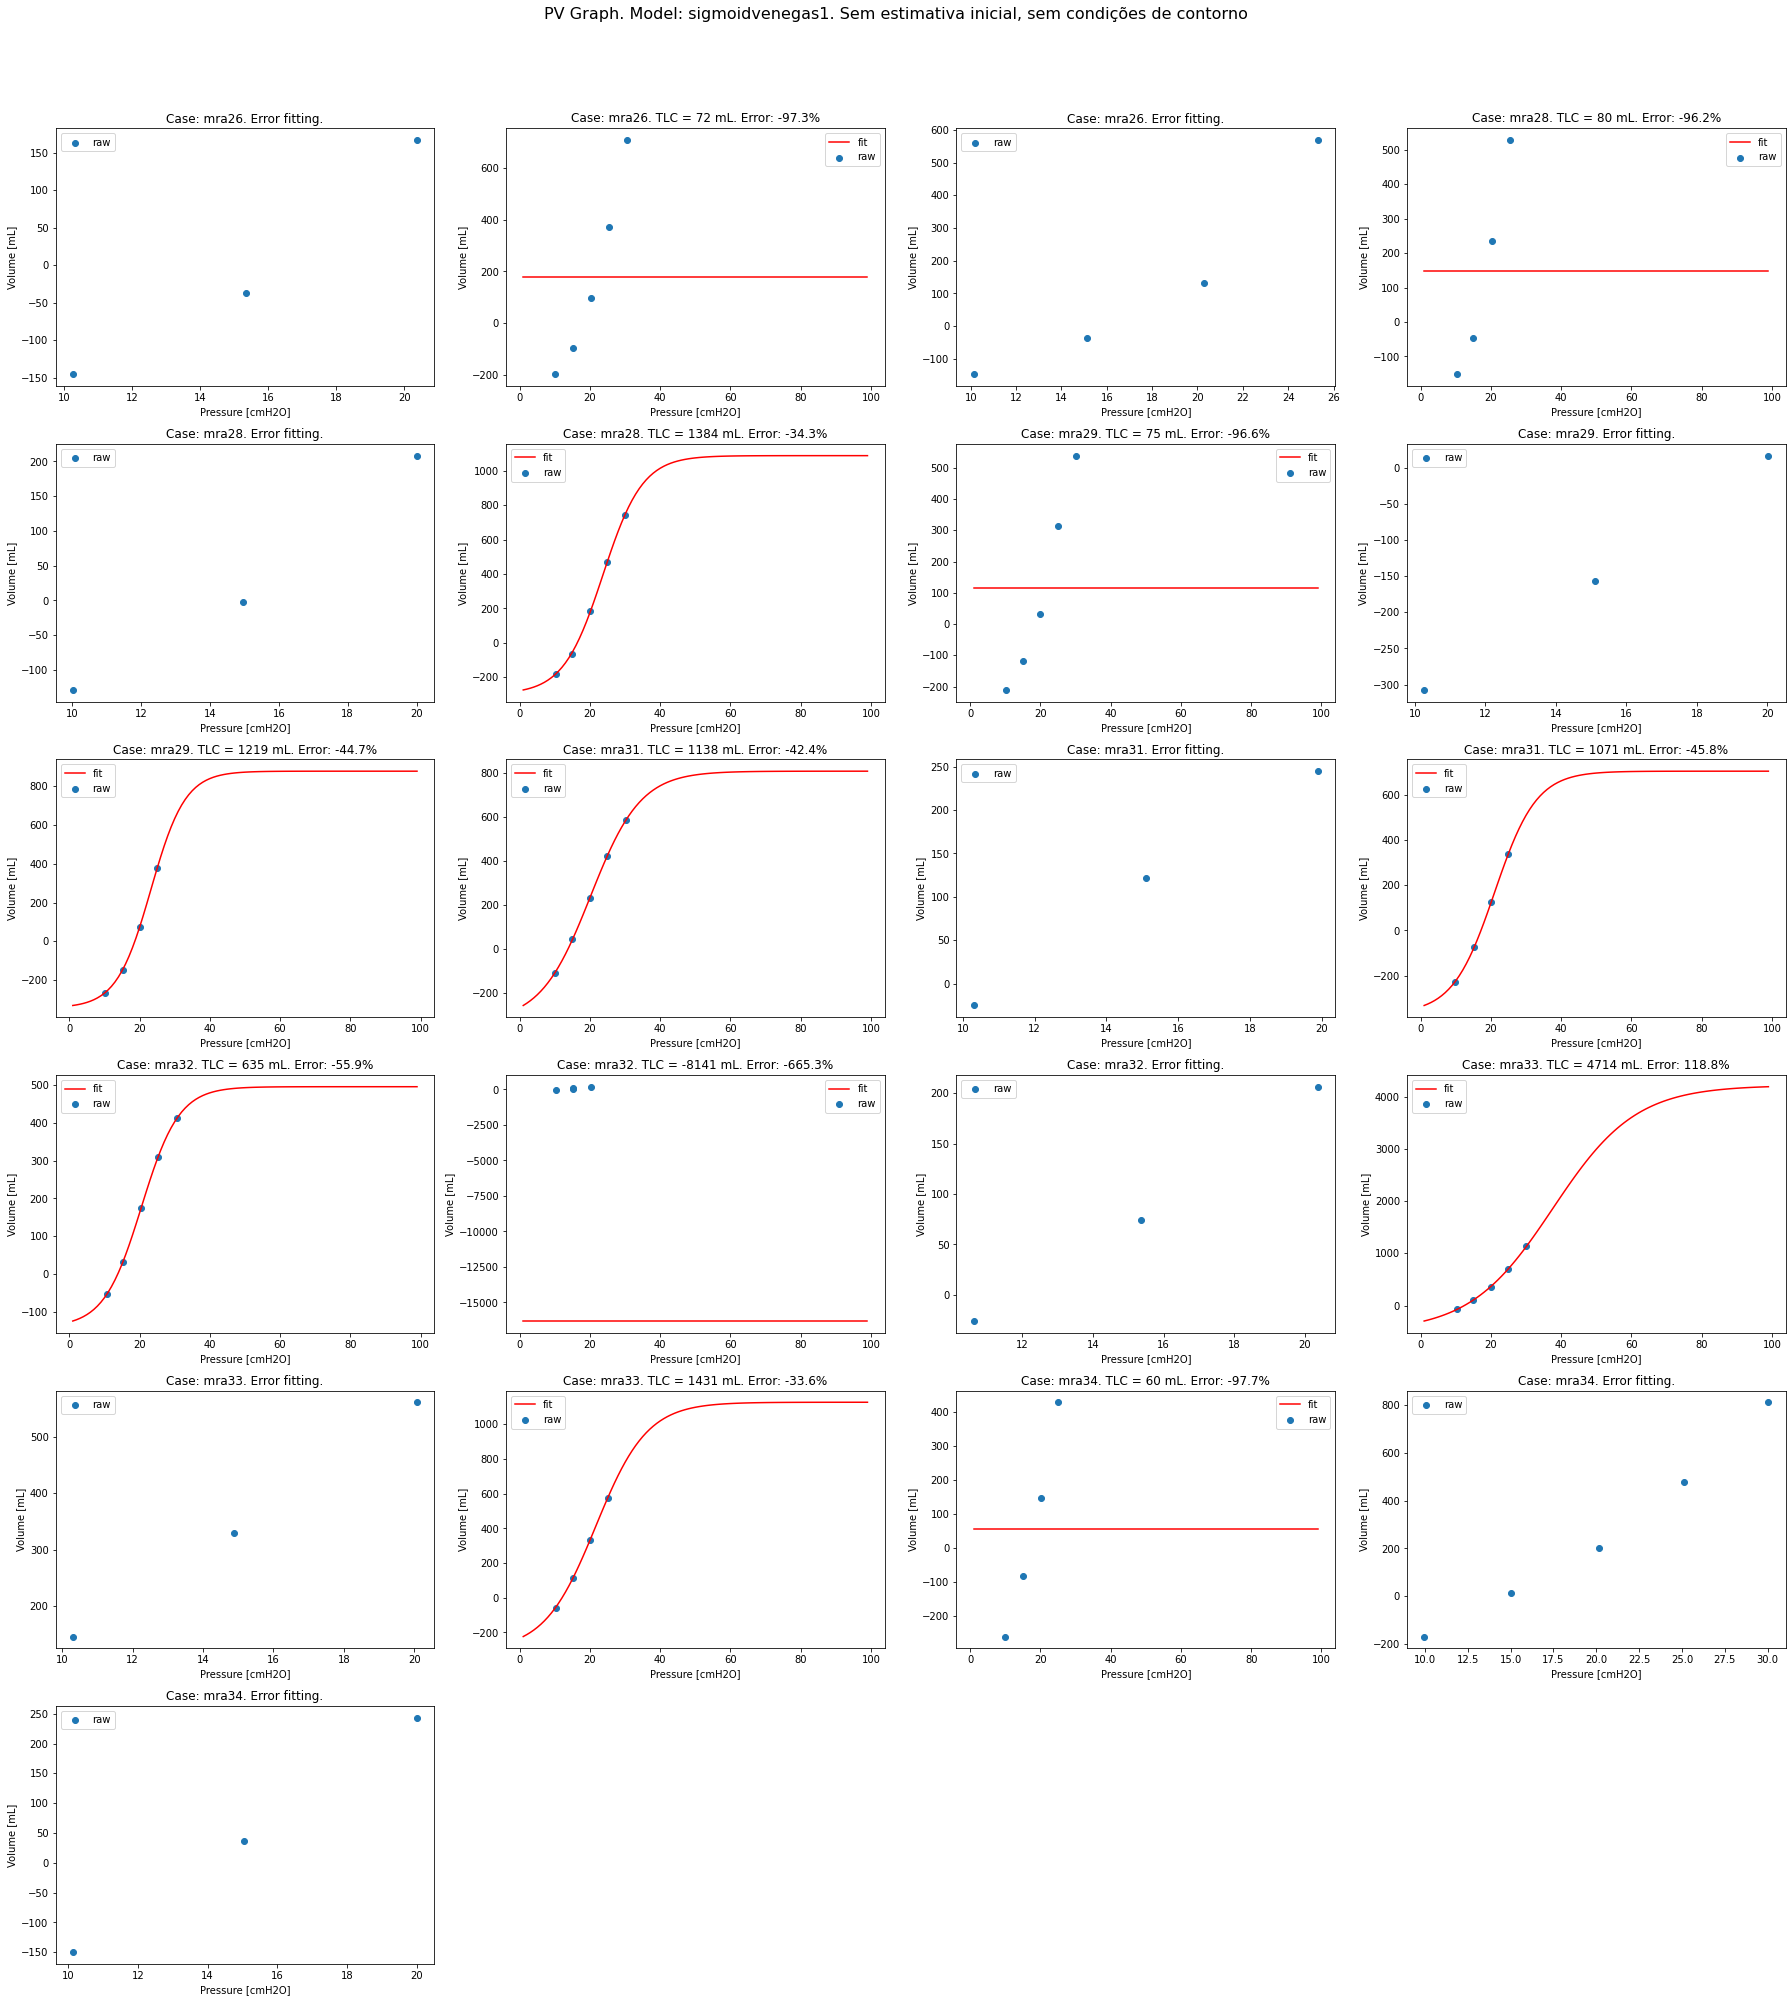

Norma(erro): 711.1. Erro médio: 119.04%. Ajustados: 12.


(711.0687203391459, 119.03872461065326, 12)

In [13]:
modelo = m.sigmoidvenegas1
metodo = 'lm'
texto = 'Sem estimativa inicial, sem condições de contorno - lm'
TLC_index = 1
m.testa_modelo(dadosdf, modelo, metodo=metodo, texto=texto, TLC_index=TLC_index)

#### Modelo sigmoidvenegas1 - Sem estimativa inicial, sem condições de contorno.
#### Método dogbox

Testando caso 0: mra26: [  166.6  -312.4    15.5 -0.245 ]
Testando caso 1: mra26: [ -294.7  1695.6    28.1     6.4 ]
	Caso 2 (mra26) deu erro...
Testando caso 3: mra28: [  -89.9   477.1    17.7 0.038 ]
Testando caso 4: mra28: [ -128.9   337.3    15.1 0.269 ]
	Caso 5 (mra28) deu erro...
Testando caso 6: mra29: [ -163.2   463.7    18.7 0.030 ]
Testando caso 7: mra29: [   16.6  -324.1    15.2 -0.110 ]
Testando caso 8: mra29: [ -207.6   432.8    17.8 0.045 ]
	Caso 9 (mra31) deu erro...
Testando caso 10: mra31: [  -25.0   269.7    15.1 0.094 ]
Testando caso 11: mra31: [ -367.2  1070.9    21.0     6.0 ]
Testando caso 12: mra32: [ -139.8   634.8    20.6     5.3 ]
Testando caso 13: mra32: [-8155.3 -8155.3     1.0 0.186 ]
Testando caso 14: mra32: [  -25.9   232.2    15.6 0.240 ]
Testando caso 15: mra33: [ -498.8  4714.3    37.6    11.8 ]
Testando caso 16: mra33: [   80.7   562.1    15.5     2.6 ]
Testando caso 17: mra33: [ -303.9  1431.4    21.6     7.3 ]
	Caso 18 (mra34) deu erro...
	Caso 19 (

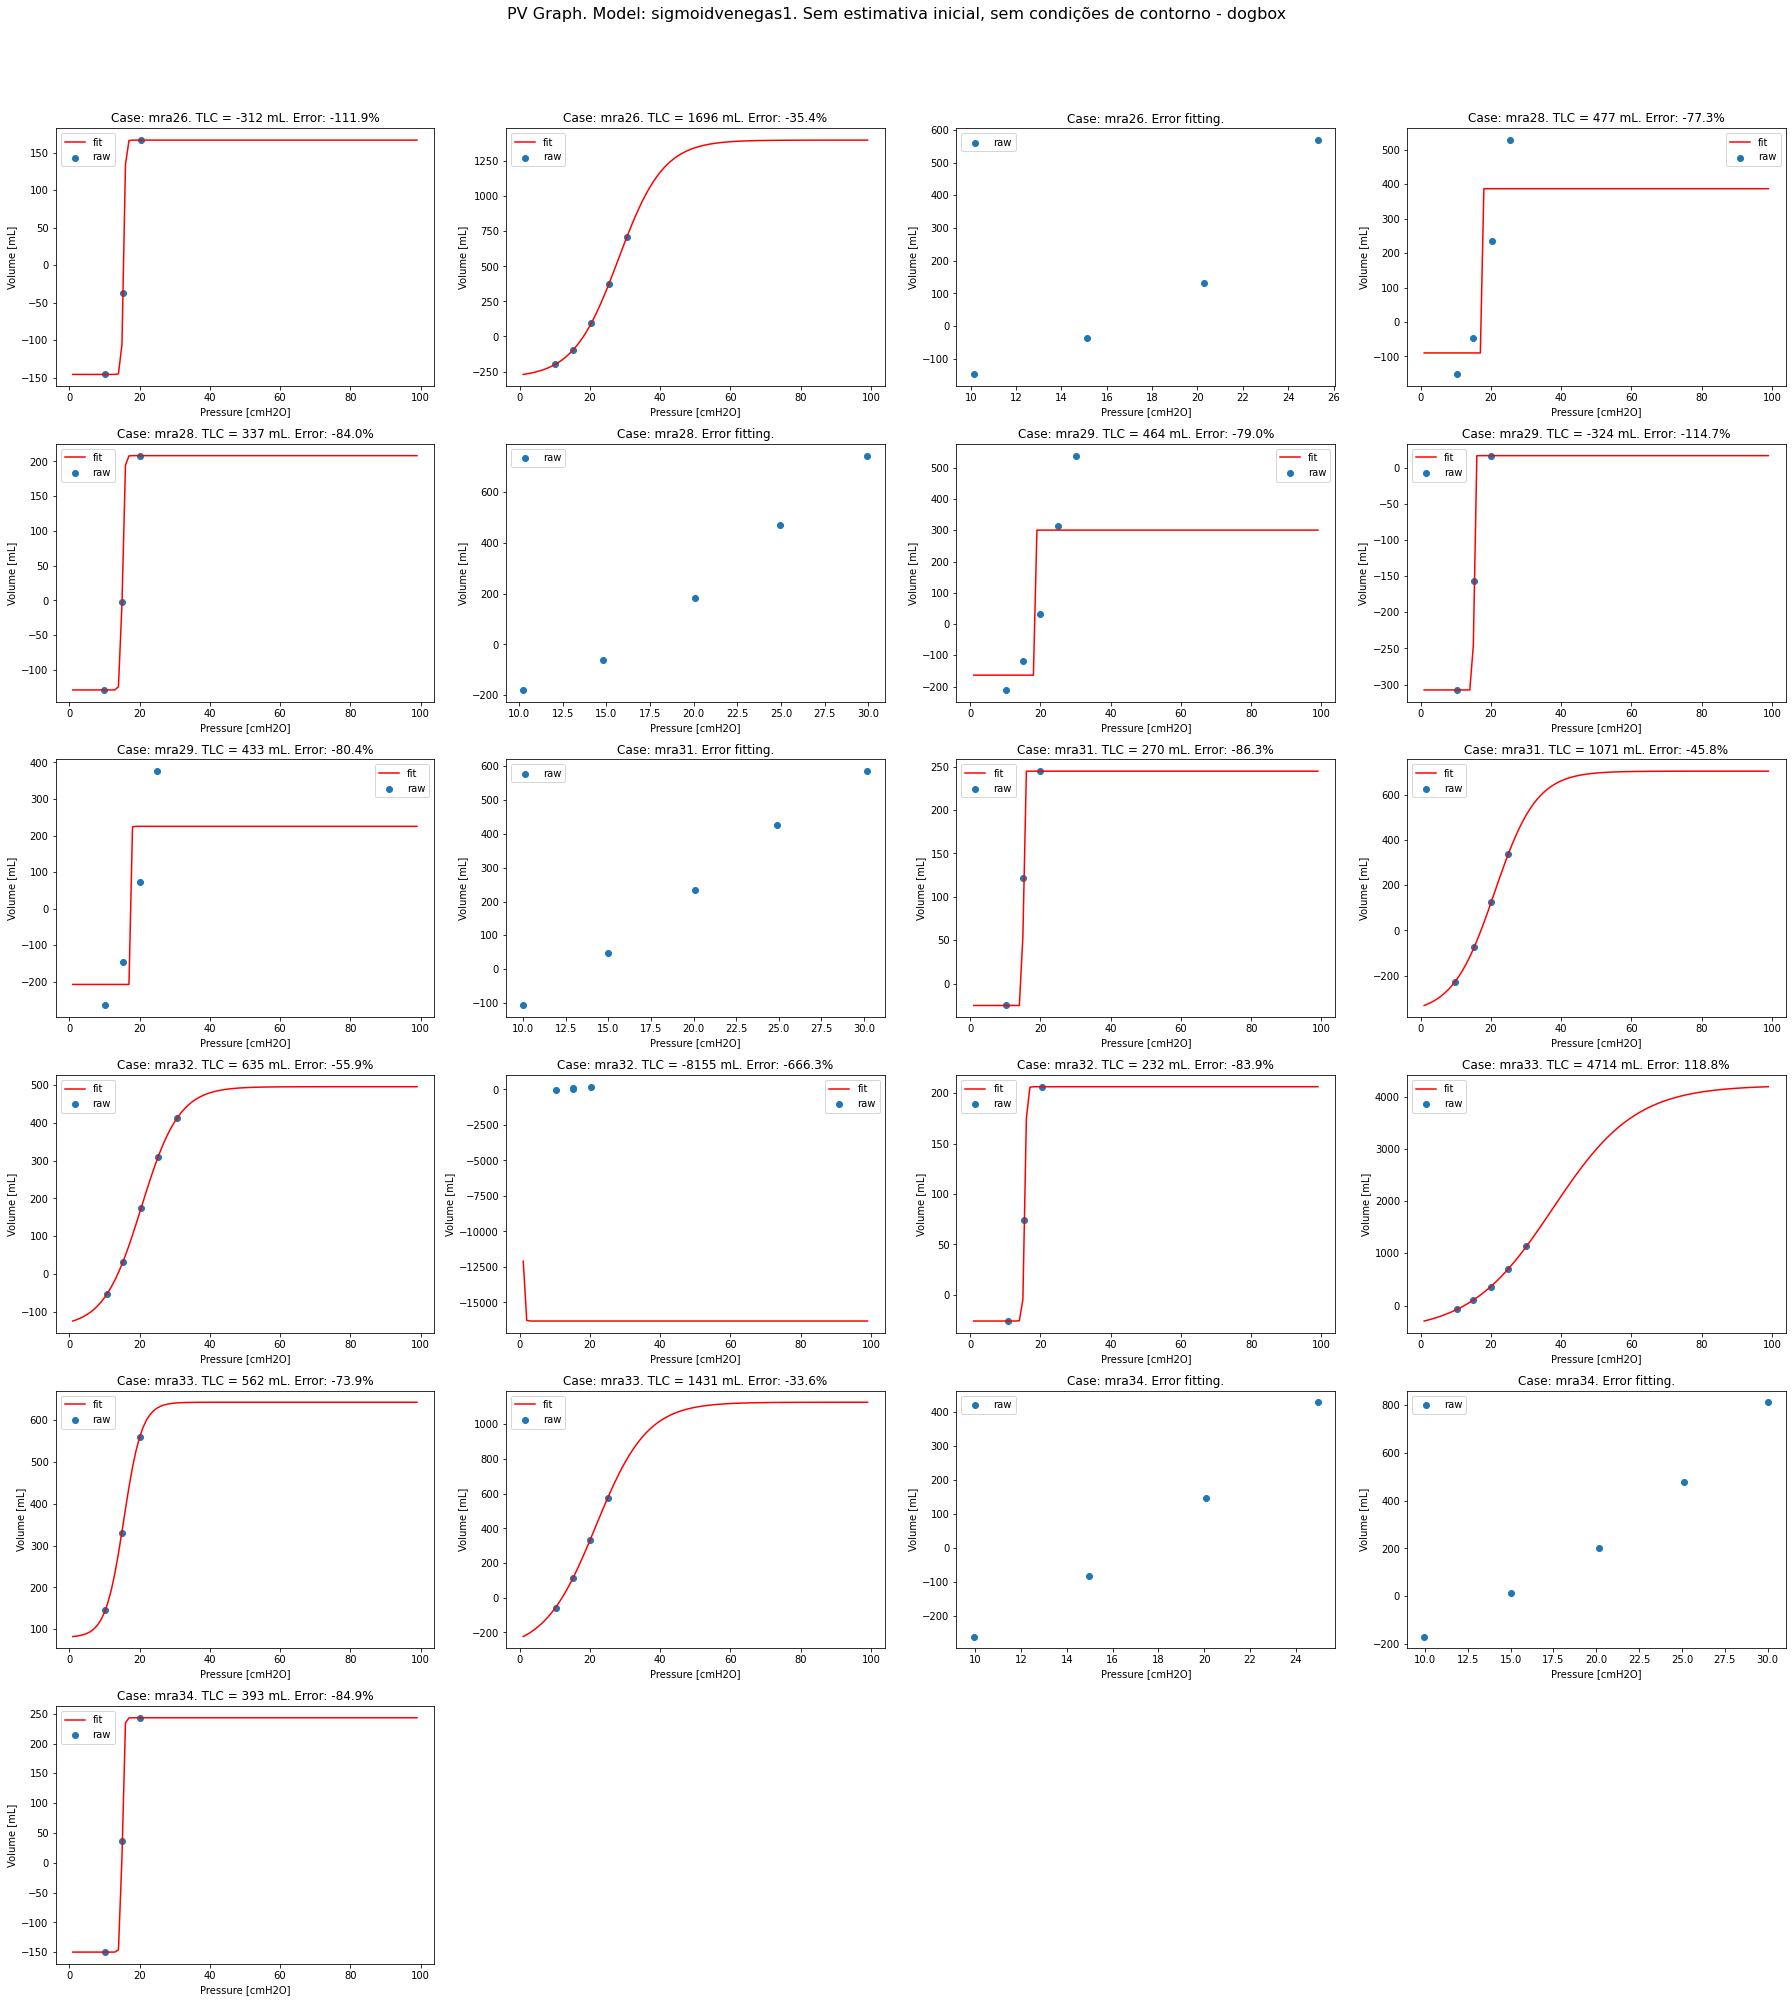

Norma(erro): 737.7. Erro médio: 114.50%. Ajustados: 16.


(737.6913334031365, 114.49865640999369, 16)

In [14]:
modelo = m.sigmoidvenegas1
metodo = 'dogbox'
texto = 'Sem estimativa inicial, sem condições de contorno - dogbox'
TLC_index = 1
m.testa_modelo(dadosdf, modelo, metodo=metodo, texto=texto, TLC_index=TLC_index)

#### Modelo sigmoidvenegas1 - Sem estimativa inicial, sem condições de contorno.
#### Método trf

Testando caso 0: mra26: [  166.6  -258.5    16.4 -0.024 ]
Testando caso 1: mra26: [ -294.7  1695.6    28.1     6.4 ]
	Caso 2 (mra26) deu erro...
Testando caso 3: mra28: [ -202.9   921.0    20.6     3.6 ]
Testando caso 4: mra28: [ -128.9   337.3    15.1 0.247 ]
Testando caso 5: mra28: [ -297.5  1384.2    23.7     5.6 ]
Testando caso 6: mra29: [ -247.6   968.3    23.7     4.3 ]
Testando caso 7: mra29: [   16.6  -324.1    15.2 -0.236 ]
Testando caso 8: mra29: [ -342.9  1219.1    23.2     4.9 ]
Testando caso 9: mra31: [  -29.3   448.3    19.7 0.003 ]
Testando caso 10: mra31: [  -25.0   269.7    15.1 0.233 ]
Testando caso 11: mra31: [ -367.2  1070.9    21.0     6.0 ]
Testando caso 12: mra32: [ -139.8   634.8    20.6     5.3 ]
Testando caso 13: mra32: [-3998.0 -12312.6   382.7    -4.4 ]
Testando caso 14: mra32: [  -25.9   232.2    15.6 0.242 ]
Testando caso 15: mra33: [ -498.8  4714.3    37.6    11.8 ]
Testando caso 16: mra33: [  712.8  -685.0    15.7    -3.5 ]
Testando caso 17: mra33: [ -30

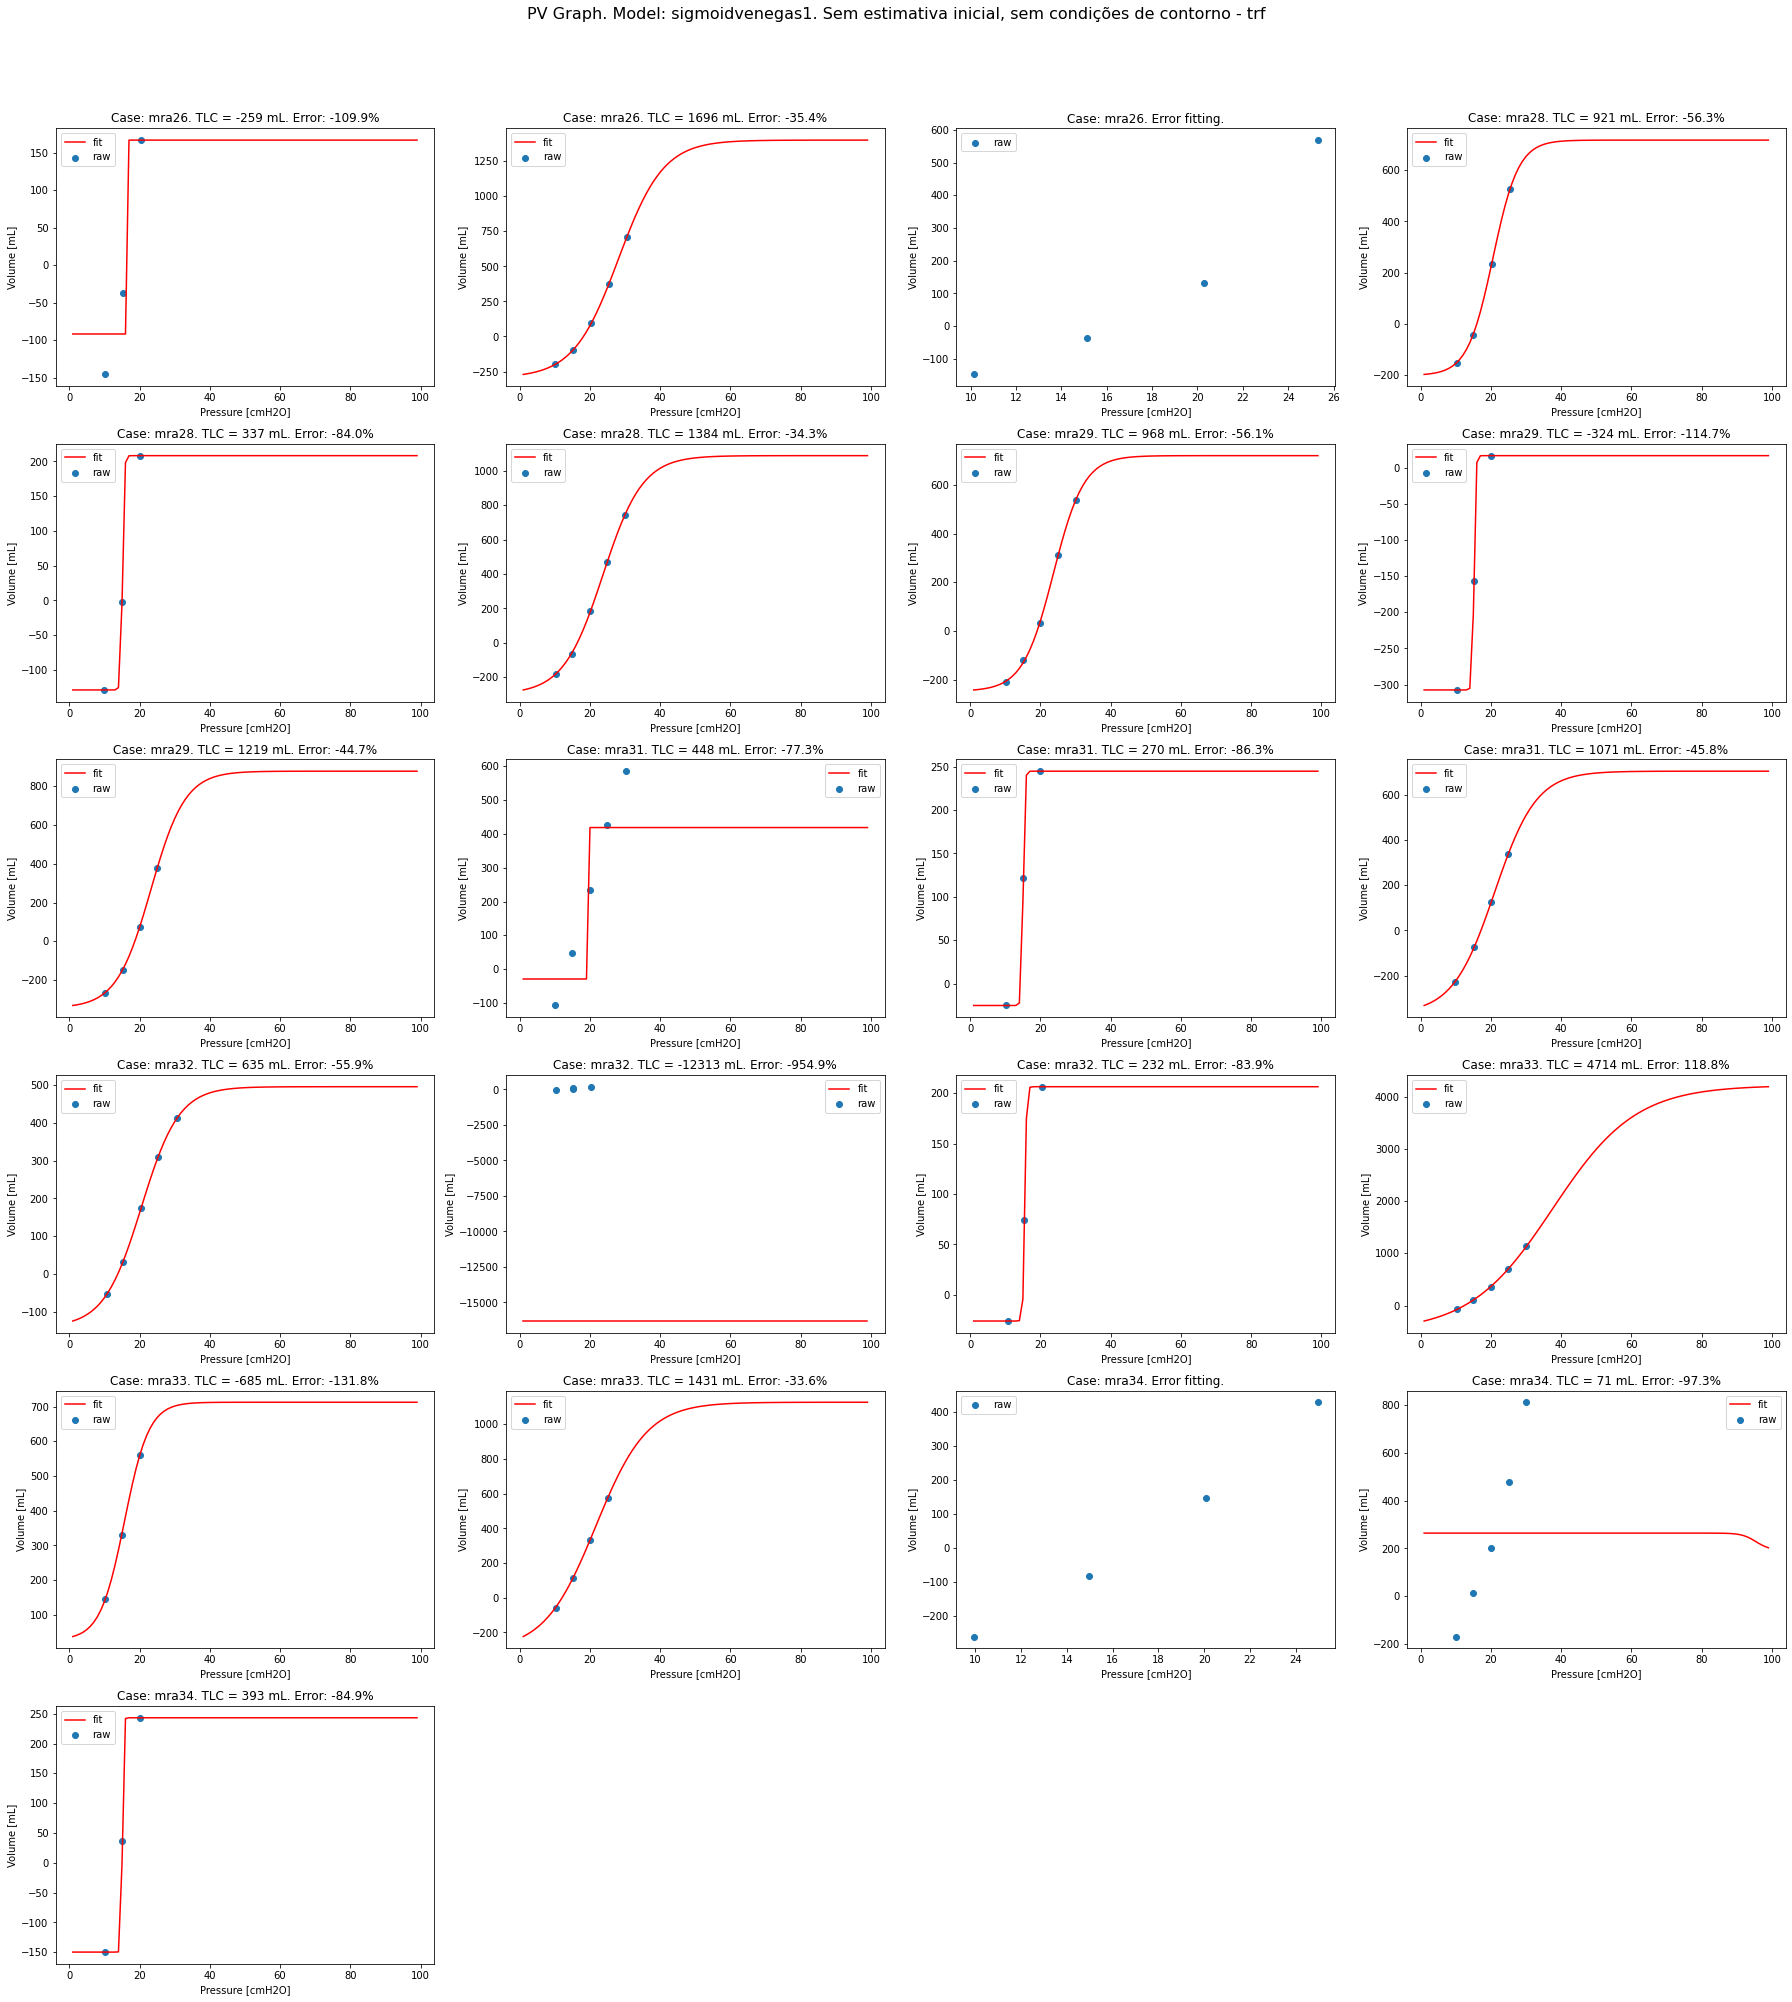

Norma(erro): 1014.8. Erro médio: 121.35%. Ajustados: 19.


(1014.8139613977249, 121.351209097232, 19)

In [16]:
modelo = m.sigmoidvenegas1
metodo = 'trf'
texto = 'Sem estimativa inicial, sem condições de contorno - trf'
TLC_index = 1
m.testa_modelo(dadosdf, modelo, metodo=metodo, texto=texto, TLC_index=TLC_index)

#### Modelo sigmoidpaivaoffset - Sem estimativa inicial, sem condições de contorno.
#### Método lm

	Caso 0 (mra26) deu erro...
Testando caso 1: mra26: [   86.0 3682950.9 -348786.2   176.7 ]
Testando caso 2: mra26: [   79.0 3150576.9 -311014.3   129.4 ]
Testando caso 3: mra28: [   80.7 3513351.6 -347877.9   148.6 ]
	Caso 4 (mra28) deu erro...
Testando caso 5: mra28: [   87.7 3082385.9 -303667.7   234.9 ]
Testando caso 6: mra29: [   74.7 4329881.6 -445714.6   115.0 ]
	Caso 7 (mra29) deu erro...
Testando caso 8: mra29: [    6.2 1235596.9 -115788.8     8.8 ]
Testando caso 9: mra31: [   91.8 2101419.1 -211641.3   239.6 ]
	Caso 10 (mra31) deu erro...
Testando caso 11: mra31: [   59.8 2157709.7 -351325.8    34.7 ]
Testando caso 12: mra32: [   91.5 4003524.4 -390318.3   179.1 ]
Testando caso 13: mra32: [-12844.9 -22580.9  2304.1 -3465.7 ]
	Caso 14 (mra32) deu erro...
Testando caso 15: mra33: [   99.5 1703625.9 -166976.4   454.2 ]
	Caso 16 (mra33) deu erro...
Testando caso 17: mra33: [   99.8 2374621.2 -236118.9   242.1 ]
Testando caso 18: mra34: [   59.5 3216839.0 -341311.3    57.0 ]
Testan

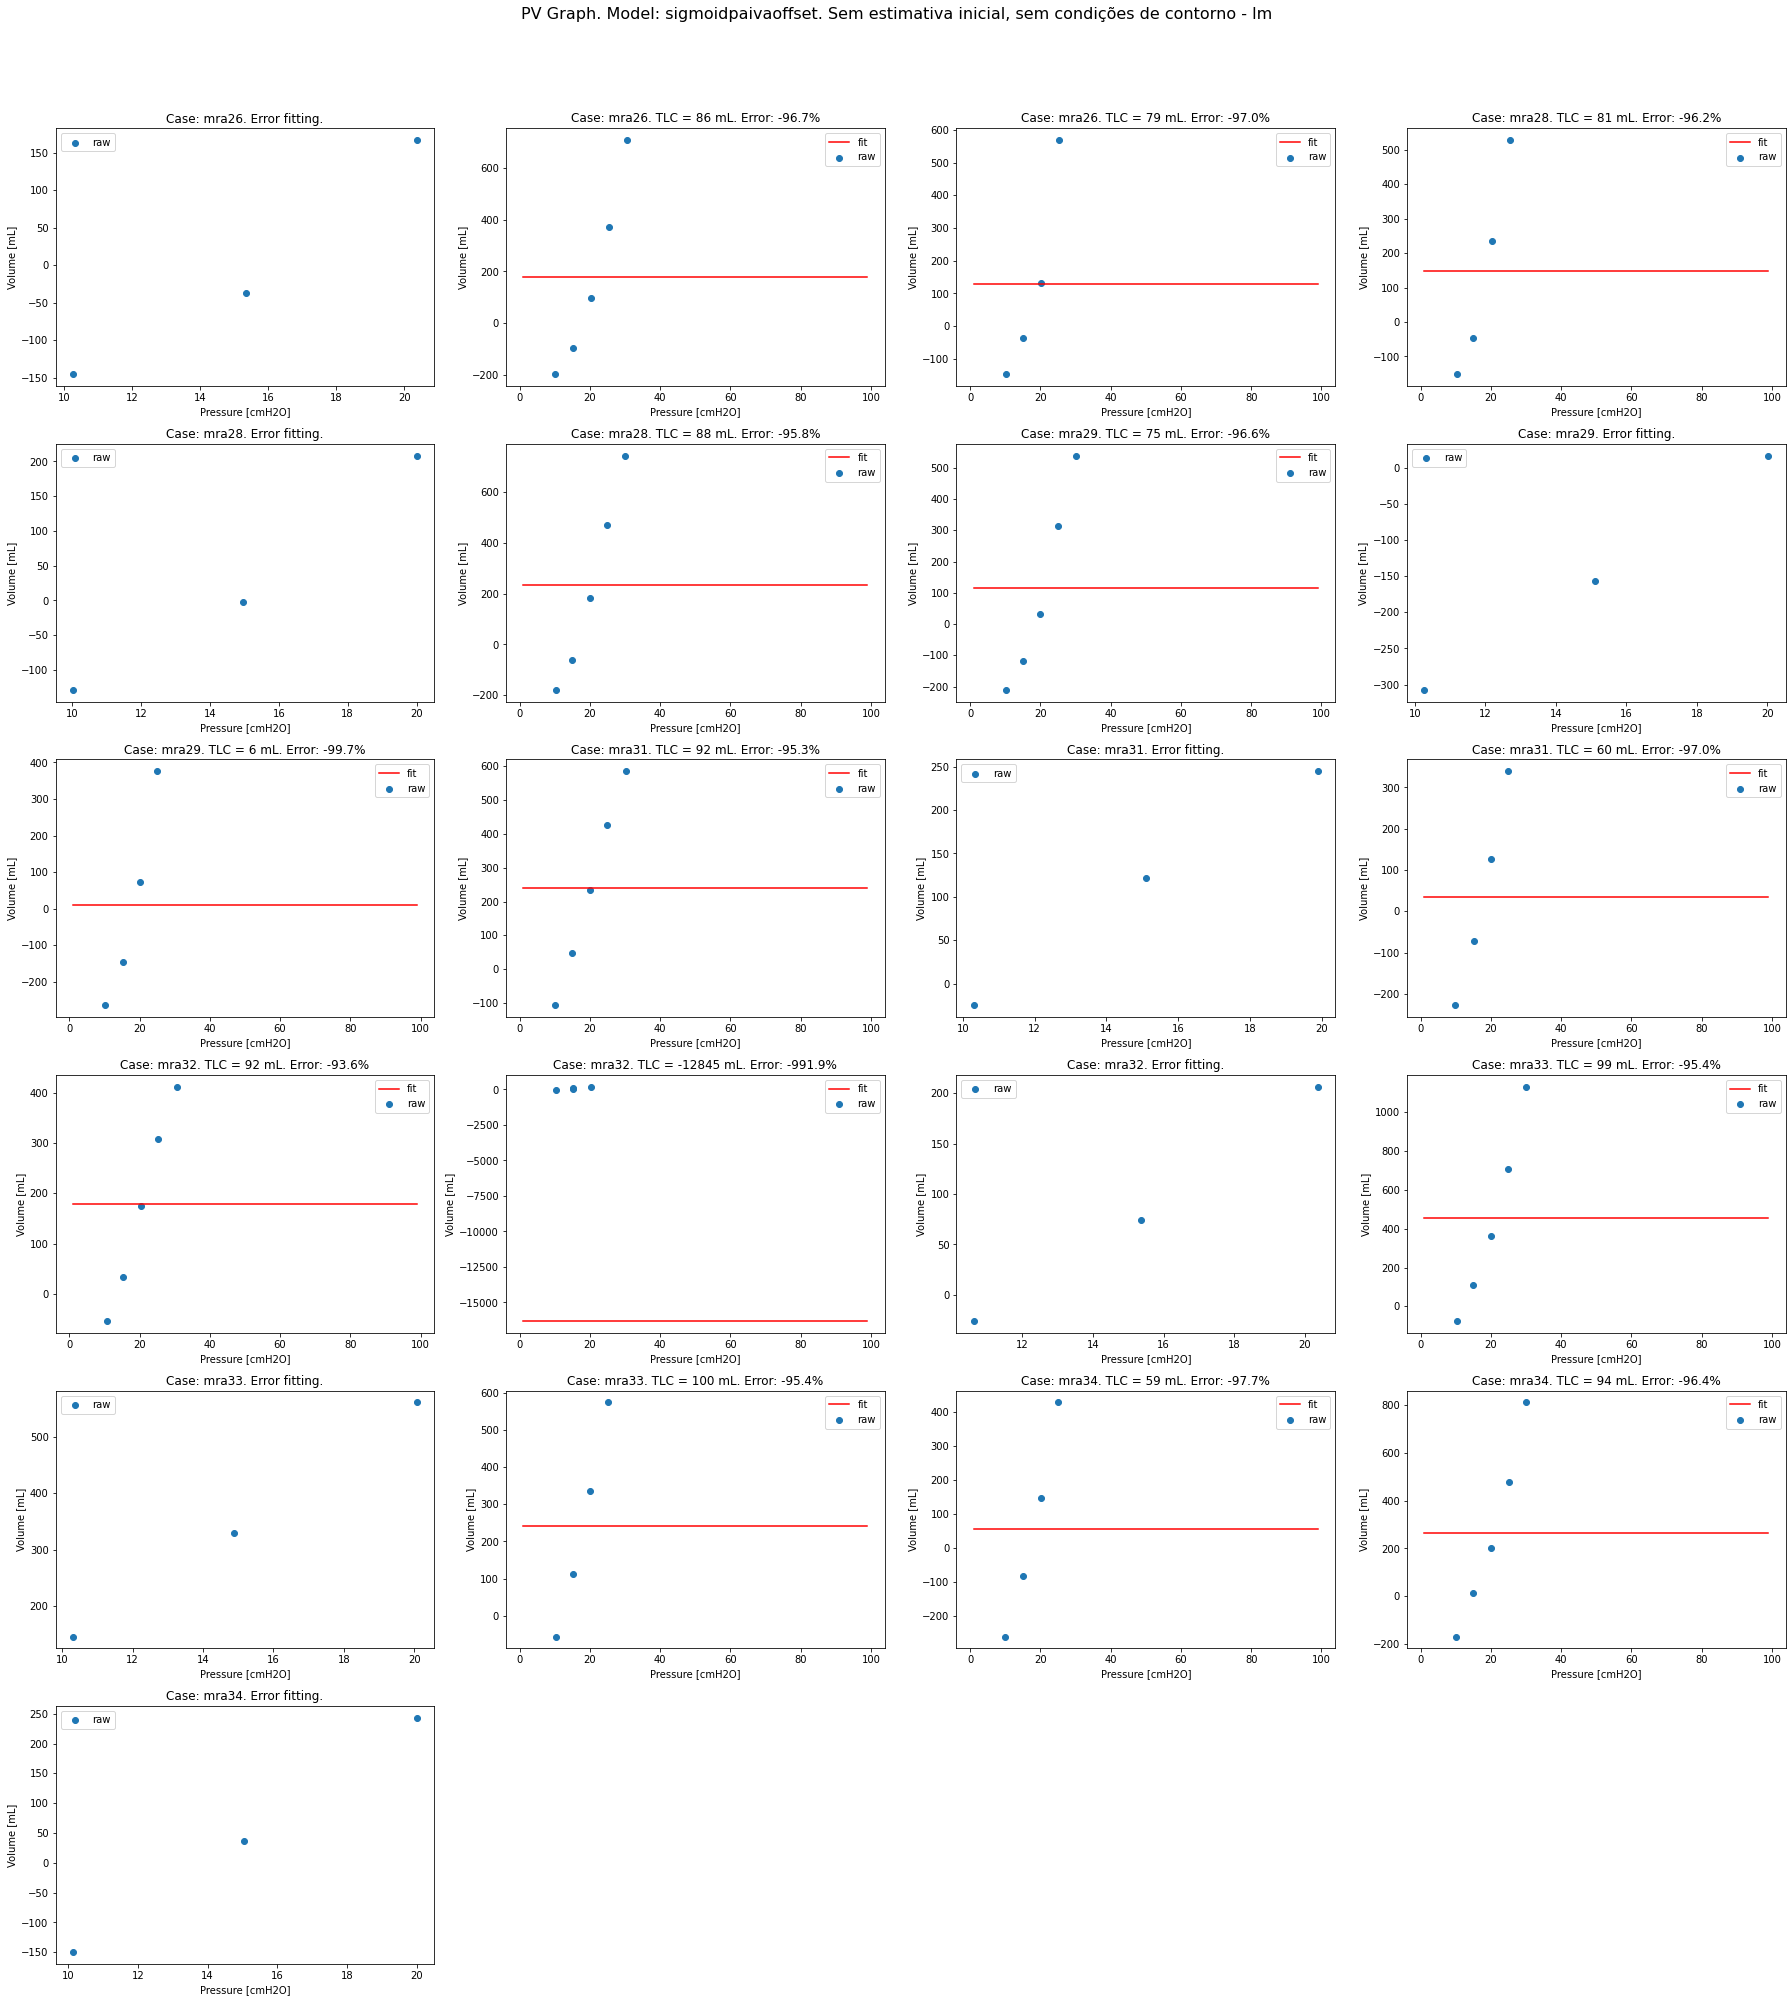

Norma(erro): 1051.0. Erro médio: 160.34%. Ajustados: 14.


(1050.9991416696078, 160.33844064015395, 14)

In [29]:
modelo = m.sigmoidpaivaoffset
metodo = 'lm'
texto = 'Sem estimativa inicial, sem condições de contorno - lm'
TLC_index = 0
m.testa_modelo(dadosdf, modelo, metodo=metodo, texto=texto, TLC_index=TLC_index)

#### Modelo sigmoidpaivaoffset - Sem estimativa inicial, sem condições de contorno.
#### Método dogbox

	Caso 0 (mra26) deu erro...
Testando caso 1: mra26: [   84.3     1.0     4.0    92.4 ]
	Caso 2 (mra26) deu erro...
	Caso 3 (mra28) deu erro...
	Caso 4 (mra28) deu erro...
	Caso 5 (mra28) deu erro...
	Caso 6 (mra29) deu erro...
Testando caso 7: mra29: [  -30.0    -3.2    -1.6  -148.7 ]
	Caso 8 (mra29) deu erro...
	Caso 9 (mra31) deu erro...
	Caso 10 (mra31) deu erro...
	Caso 11 (mra31) deu erro...
	Caso 12 (mra32) deu erro...
Testando caso 13: mra32: [  -61.9     2.6   -19.0 -16310.6 ]
	Caso 14 (mra32) deu erro...
	Caso 15 (mra33) deu erro...
	Caso 16 (mra33) deu erro...
	Caso 17 (mra33) deu erro...
	Caso 18 (mra34) deu erro...
	Caso 19 (mra34) deu erro...
	Caso 20 (mra34) deu erro...


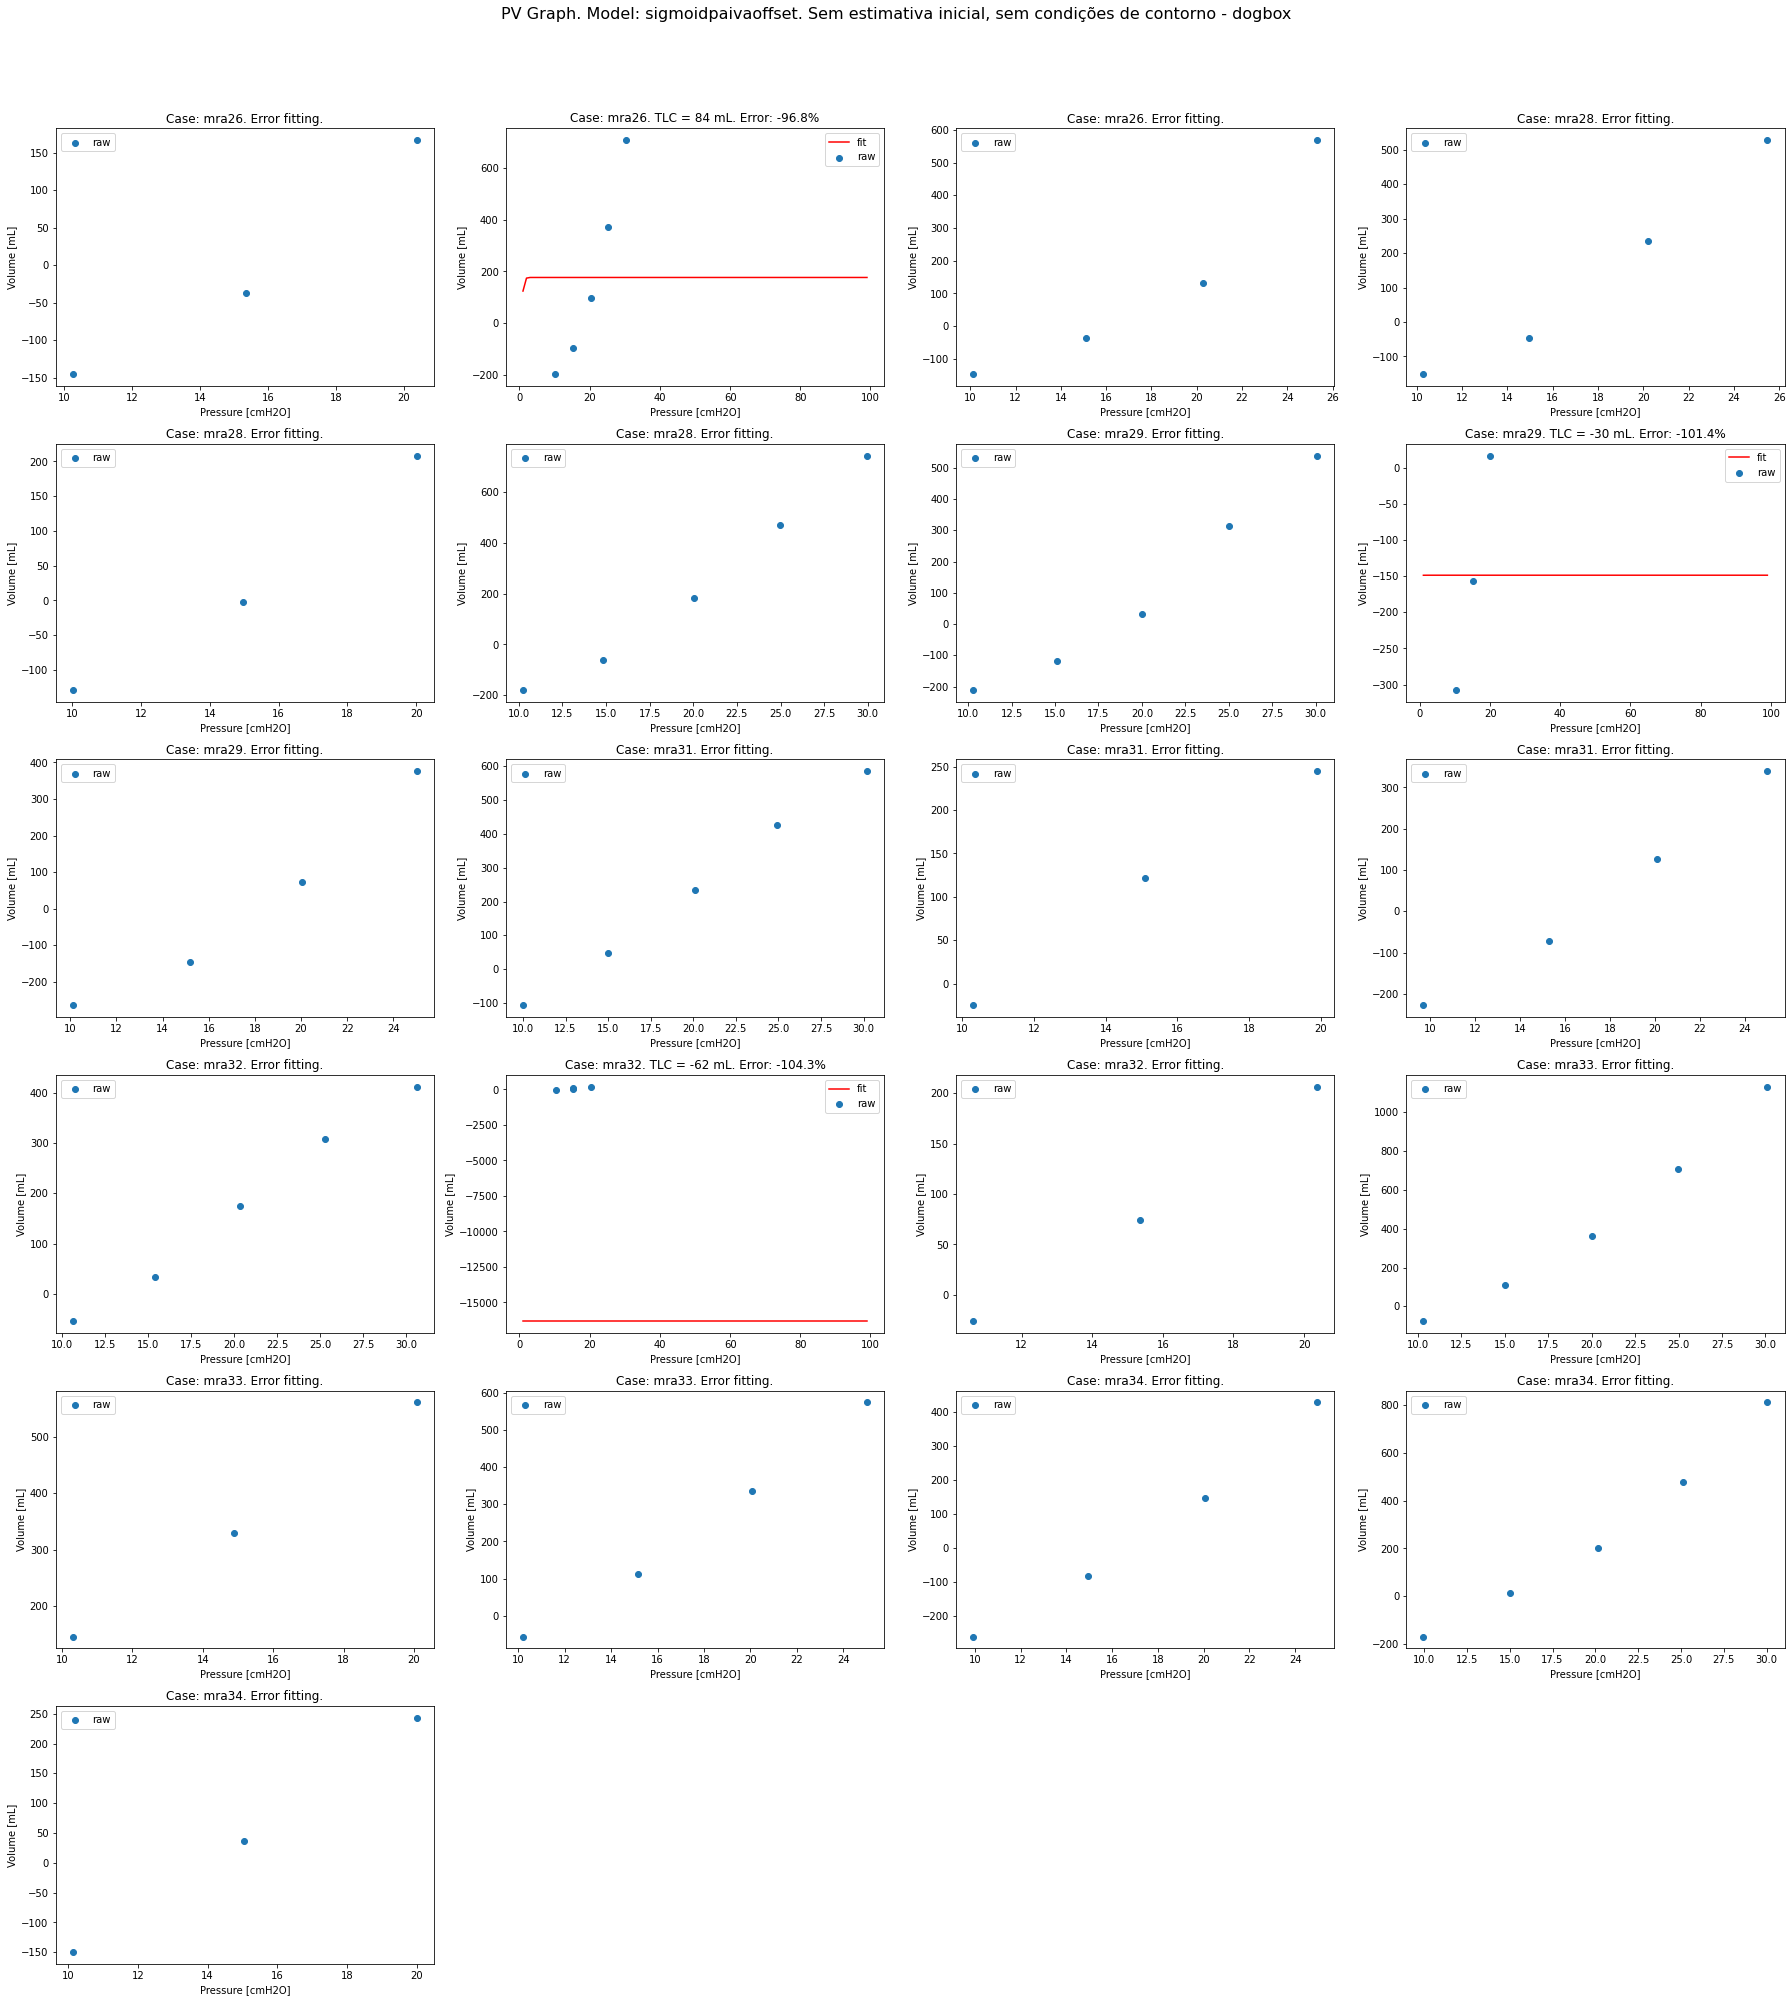

Norma(erro): 174.7. Erro médio: 100.81%. Ajustados: 3.


(174.69611063857965, 100.81346294248074, 3)

In [30]:
modelo = m.sigmoidpaivaoffset
metodo = 'dogbox'
texto = 'Sem estimativa inicial, sem condições de contorno - dogbox'
TLC_index = 0
m.testa_modelo(dadosdf, modelo, metodo=metodo, texto=texto, TLC_index=TLC_index)

#### Modelo sigmoidpaivaoffset - Sem estimativa inicial, sem condições de contorno.
#### Método trf

Testando caso 0: mra26: [   -3.3     1.4    -3.3    -5.7 ]
	Caso 1 (mra26) deu erro...
	Caso 2 (mra26) deu erro...
	Caso 3 (mra28) deu erro...
	Caso 4 (mra28) deu erro...
	Caso 5 (mra28) deu erro...
	Caso 6 (mra29) deu erro...
	Caso 7 (mra29) deu erro...
	Caso 8 (mra29) deu erro...
Testando caso 9: mra31: [   44.7 -0.588    -3.2   239.6 ]
	Caso 10 (mra31) deu erro...
	Caso 11 (mra31) deu erro...
Testando caso 12: mra32: [   44.8    12.4  -127.9   179.1 ]
	Caso 13 (mra32) deu erro...
	Caso 14 (mra32) deu erro...
	Caso 15 (mra33) deu erro...
Testando caso 16: mra33: [  443.7    87.3 0.689   133.2 ]
Testando caso 17: mra33: [   44.8     8.3  -103.0   242.1 ]
	Caso 18 (mra34) deu erro...
	Caso 19 (mra34) deu erro...
	Caso 20 (mra34) deu erro...


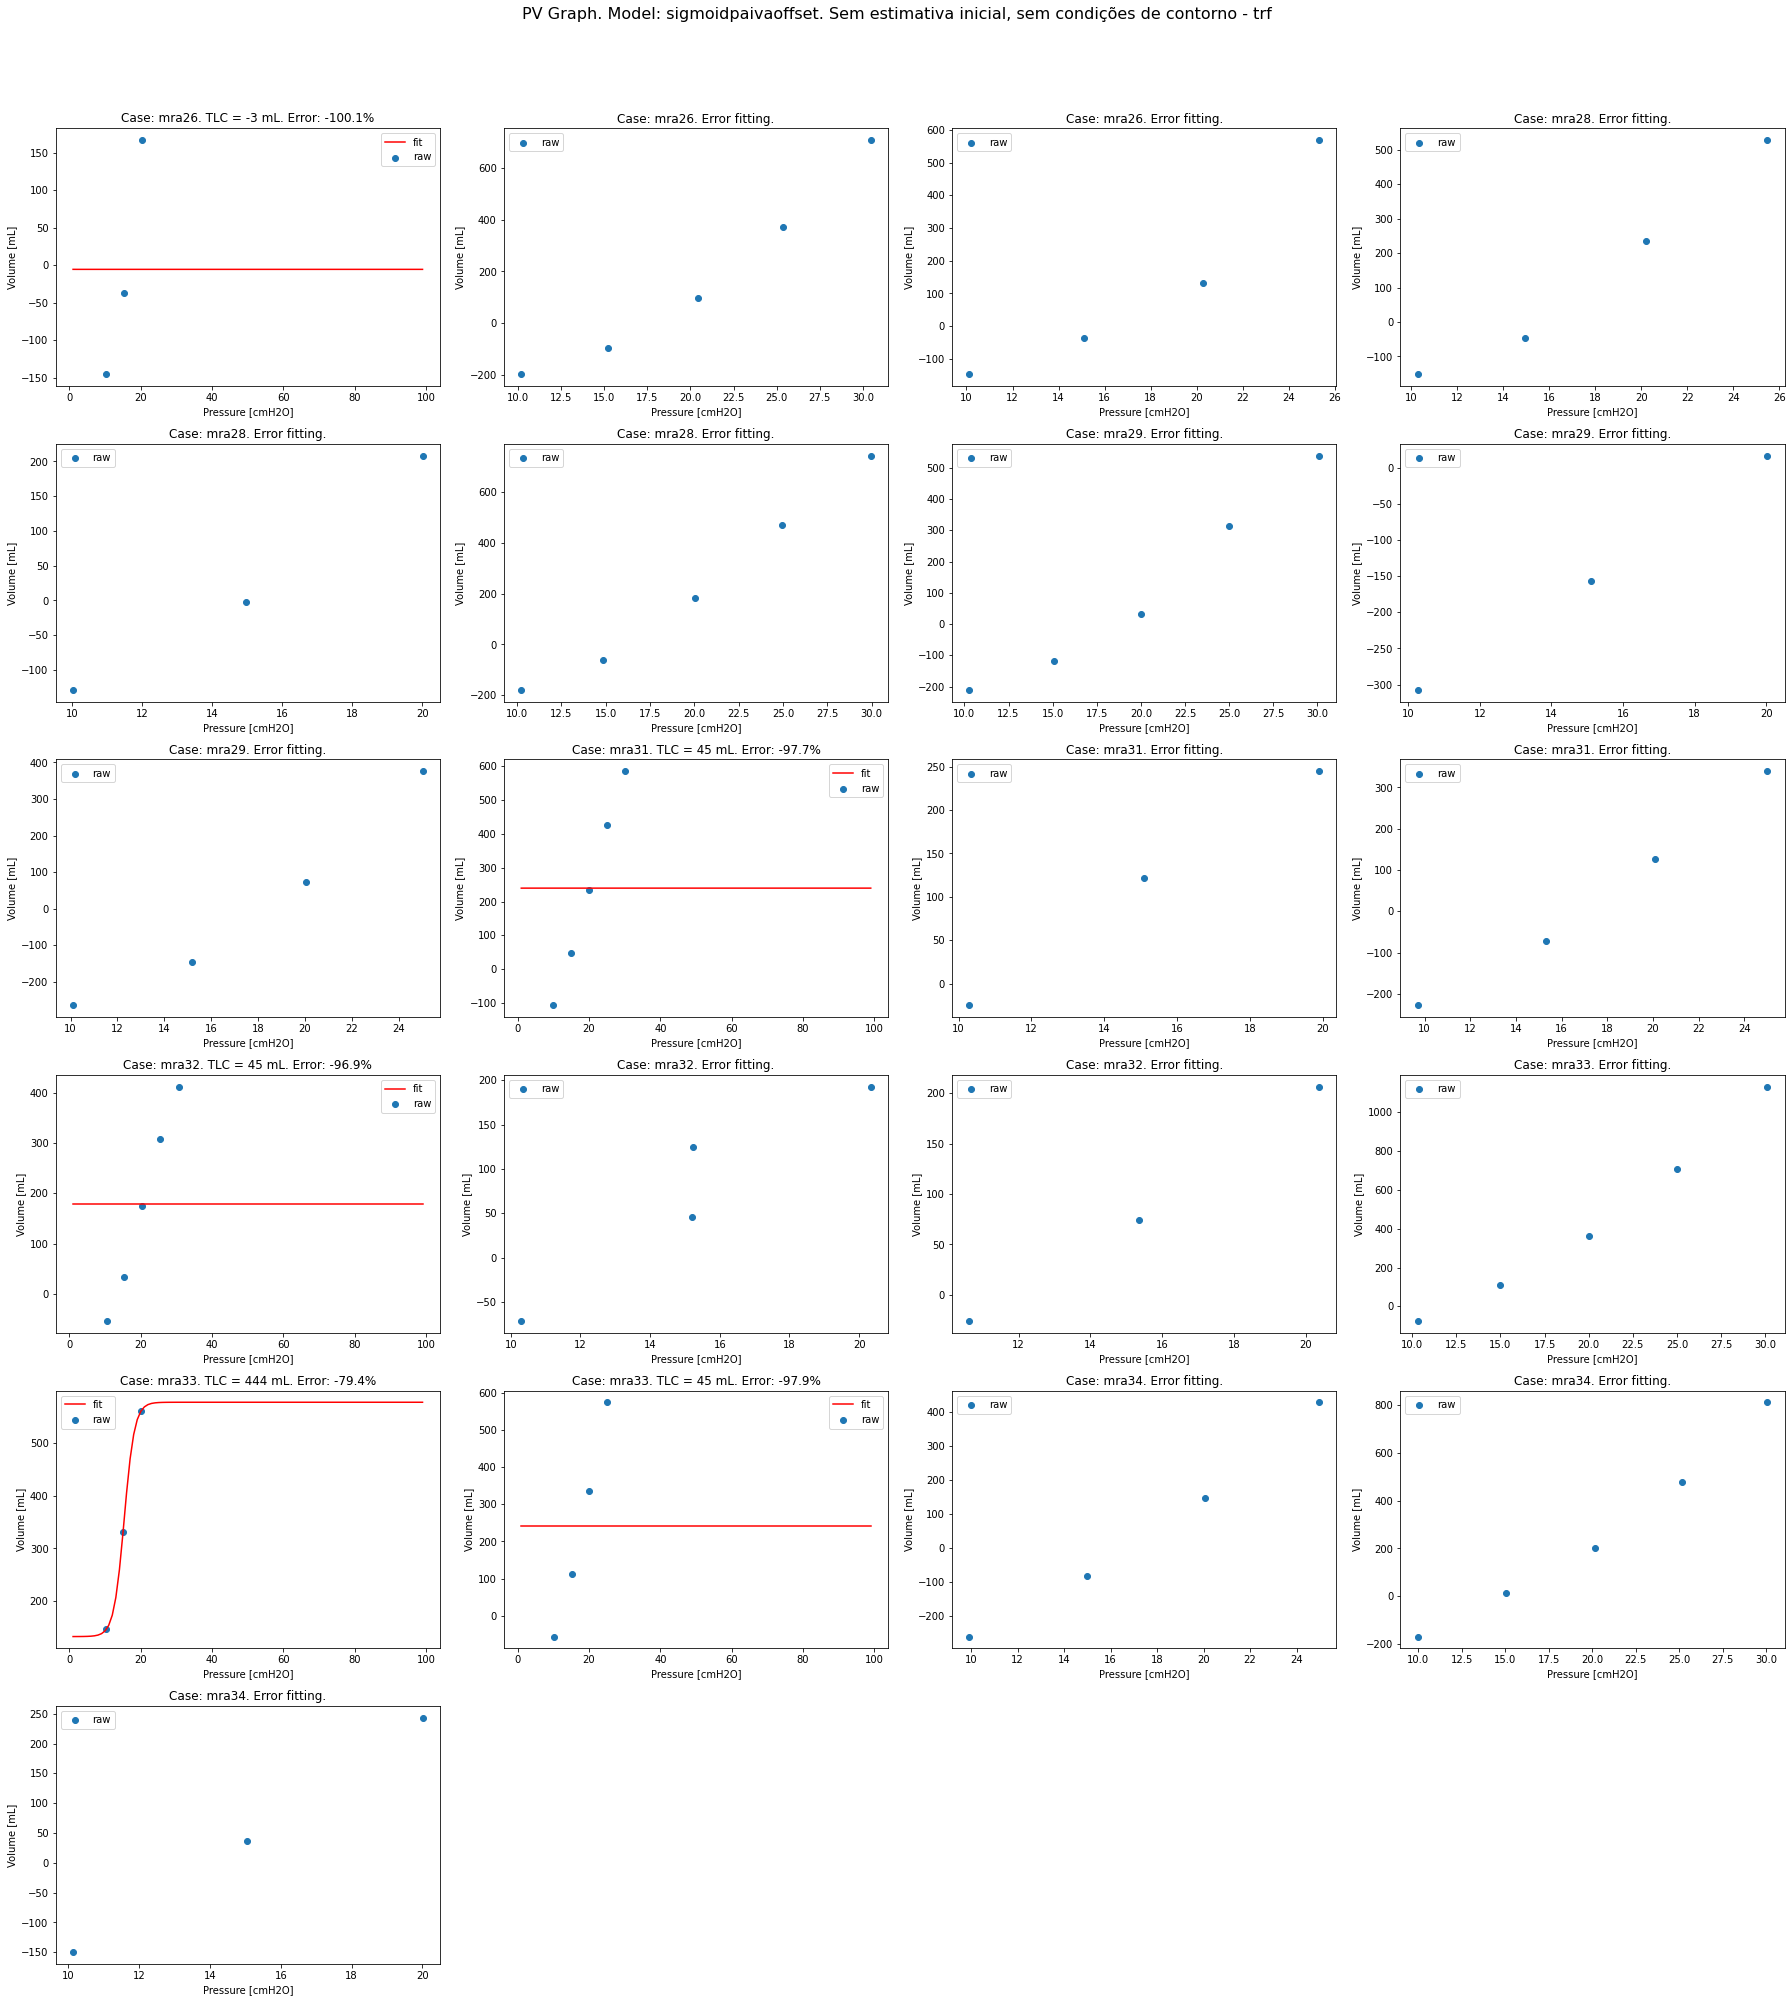

Norma(erro): 211.8. Erro médio: 94.42%. Ajustados: 5.


(211.79947434829378, 94.4158123413015, 5)

In [31]:
modelo = m.sigmoidpaivaoffset
metodo = 'trf'
texto = 'Sem estimativa inicial, sem condições de contorno - trf'
TLC_index = 0
m.testa_modelo(dadosdf, modelo, metodo=metodo, texto=texto, TLC_index=TLC_index)

#### Modelo sigmoidvenegas2offset - Sem estimativa inicial, sem condições de contorno.
#### Método lm

	Caso 0 (mra26) deu erro...
	Caso 1 (mra26) deu erro...
	Caso 2 (mra26) deu erro...
	Caso 3 (mra28) deu erro...
	Caso 4 (mra28) deu erro...
	Caso 5 (mra28) deu erro...
	Caso 6 (mra29) deu erro...
	Caso 7 (mra29) deu erro...
	Caso 8 (mra29) deu erro...
	Caso 9 (mra31) deu erro...
	Caso 10 (mra31) deu erro...
	Caso 11 (mra31) deu erro...
	Caso 12 (mra32) deu erro...
	Caso 13 (mra32) deu erro...
	Caso 14 (mra32) deu erro...
	Caso 15 (mra33) deu erro...
	Caso 16 (mra33) deu erro...
	Caso 17 (mra33) deu erro...
	Caso 18 (mra34) deu erro...
	Caso 19 (mra34) deu erro...
	Caso 20 (mra34) deu erro...


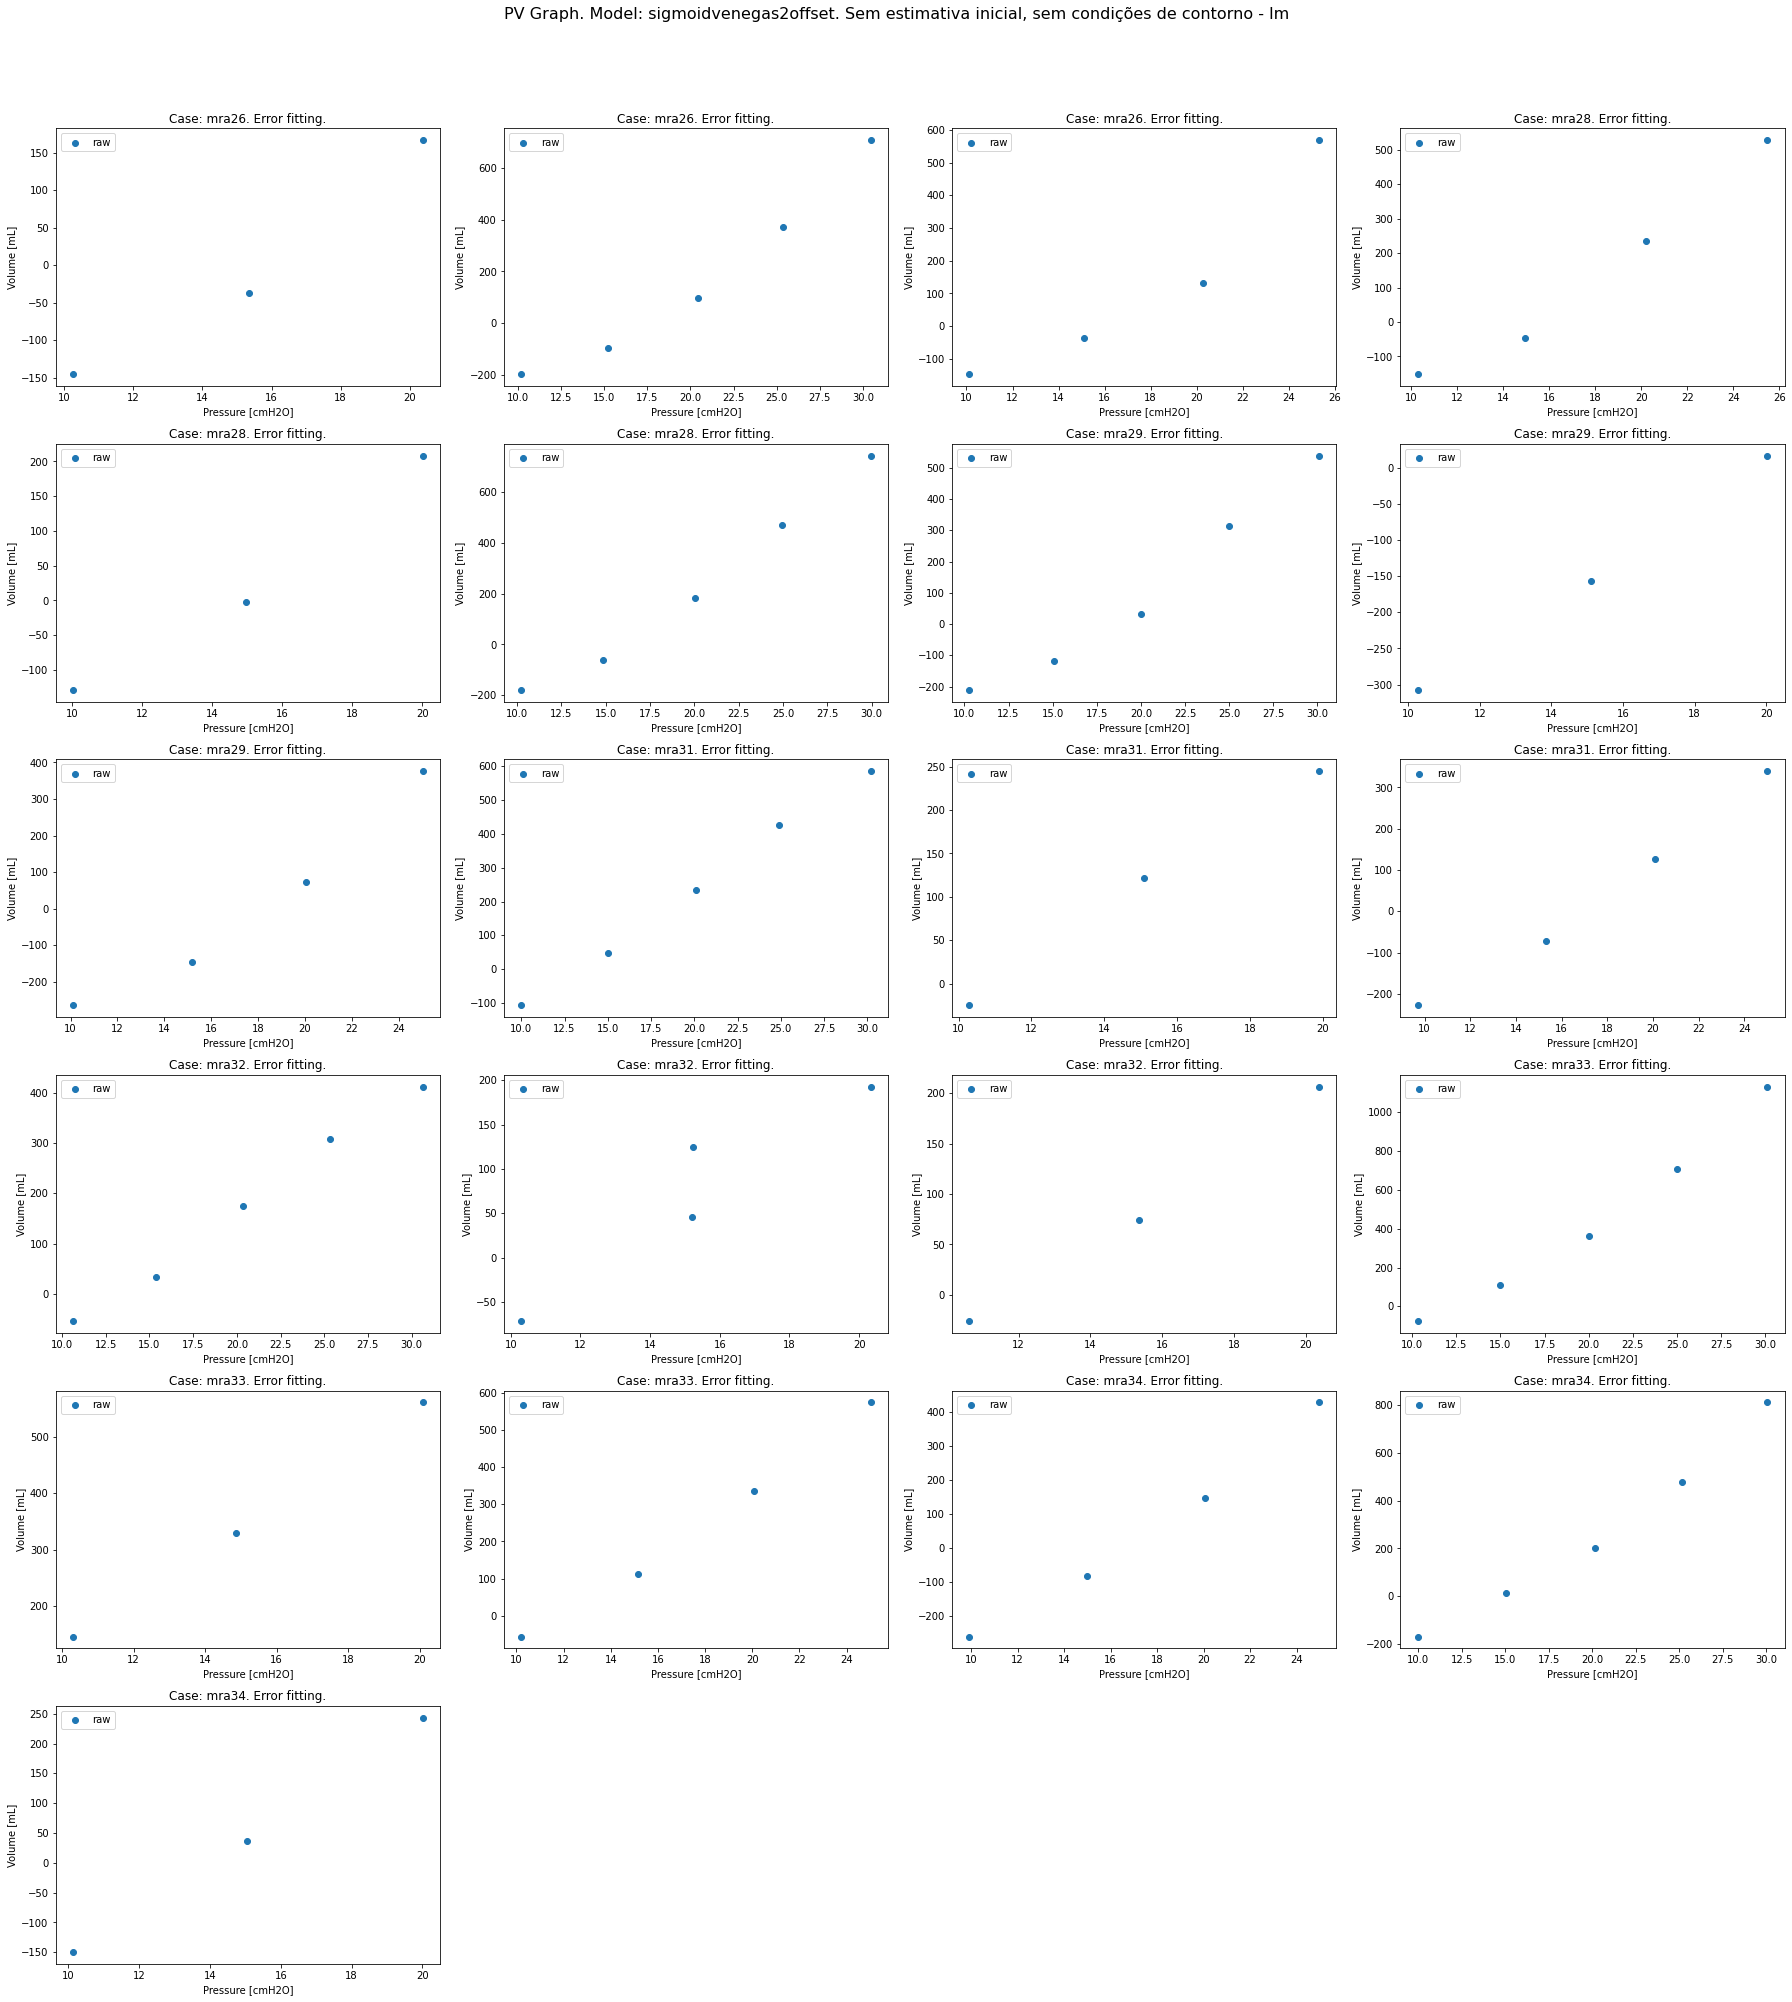

Norma(erro): -1.0. Erro médio: -1.00%. Ajustados: 0.


(-1, -1, 0)

In [9]:
modelo = m.sigmoidvenegas2offset
metodo = 'lm'
texto = 'Sem estimativa inicial, sem condições de contorno - lm'
TLC_index = 0
m.testa_modelo(dadosdf, modelo, metodo=metodo, texto=texto, TLC_index=TLC_index)

#### Modelo sigmoidvenegas2offset - Sem estimativa inicial, sem condições de contorno.
#### Método dogbox

	Caso 0 (mra26) deu erro...
	Caso 1 (mra26) deu erro...
Testando caso 2: mra26: [   85.0 0.482 -0.286    -2.0   -36.0    43.5 ]
	Caso 3 (mra28) deu erro...
	Caso 4 (mra28) deu erro...
	Caso 5 (mra28) deu erro...
	Caso 6 (mra29) deu erro...
	Caso 7 (mra29) deu erro...
	Caso 8 (mra29) deu erro...
	Caso 9 (mra31) deu erro...
	Caso 10 (mra31) deu erro...
	Caso 11 (mra31) deu erro...
	Caso 12 (mra32) deu erro...
	Caso 13 (mra32) deu erro...
	Caso 14 (mra32) deu erro...
	Caso 15 (mra33) deu erro...
Testando caso 16: mra33: [  365.1 0.927     1.8   119.6 -1263.0 -4257.1 ]
	Caso 17 (mra33) deu erro...
	Caso 18 (mra34) deu erro...
	Caso 19 (mra34) deu erro...
	Caso 20 (mra34) deu erro...


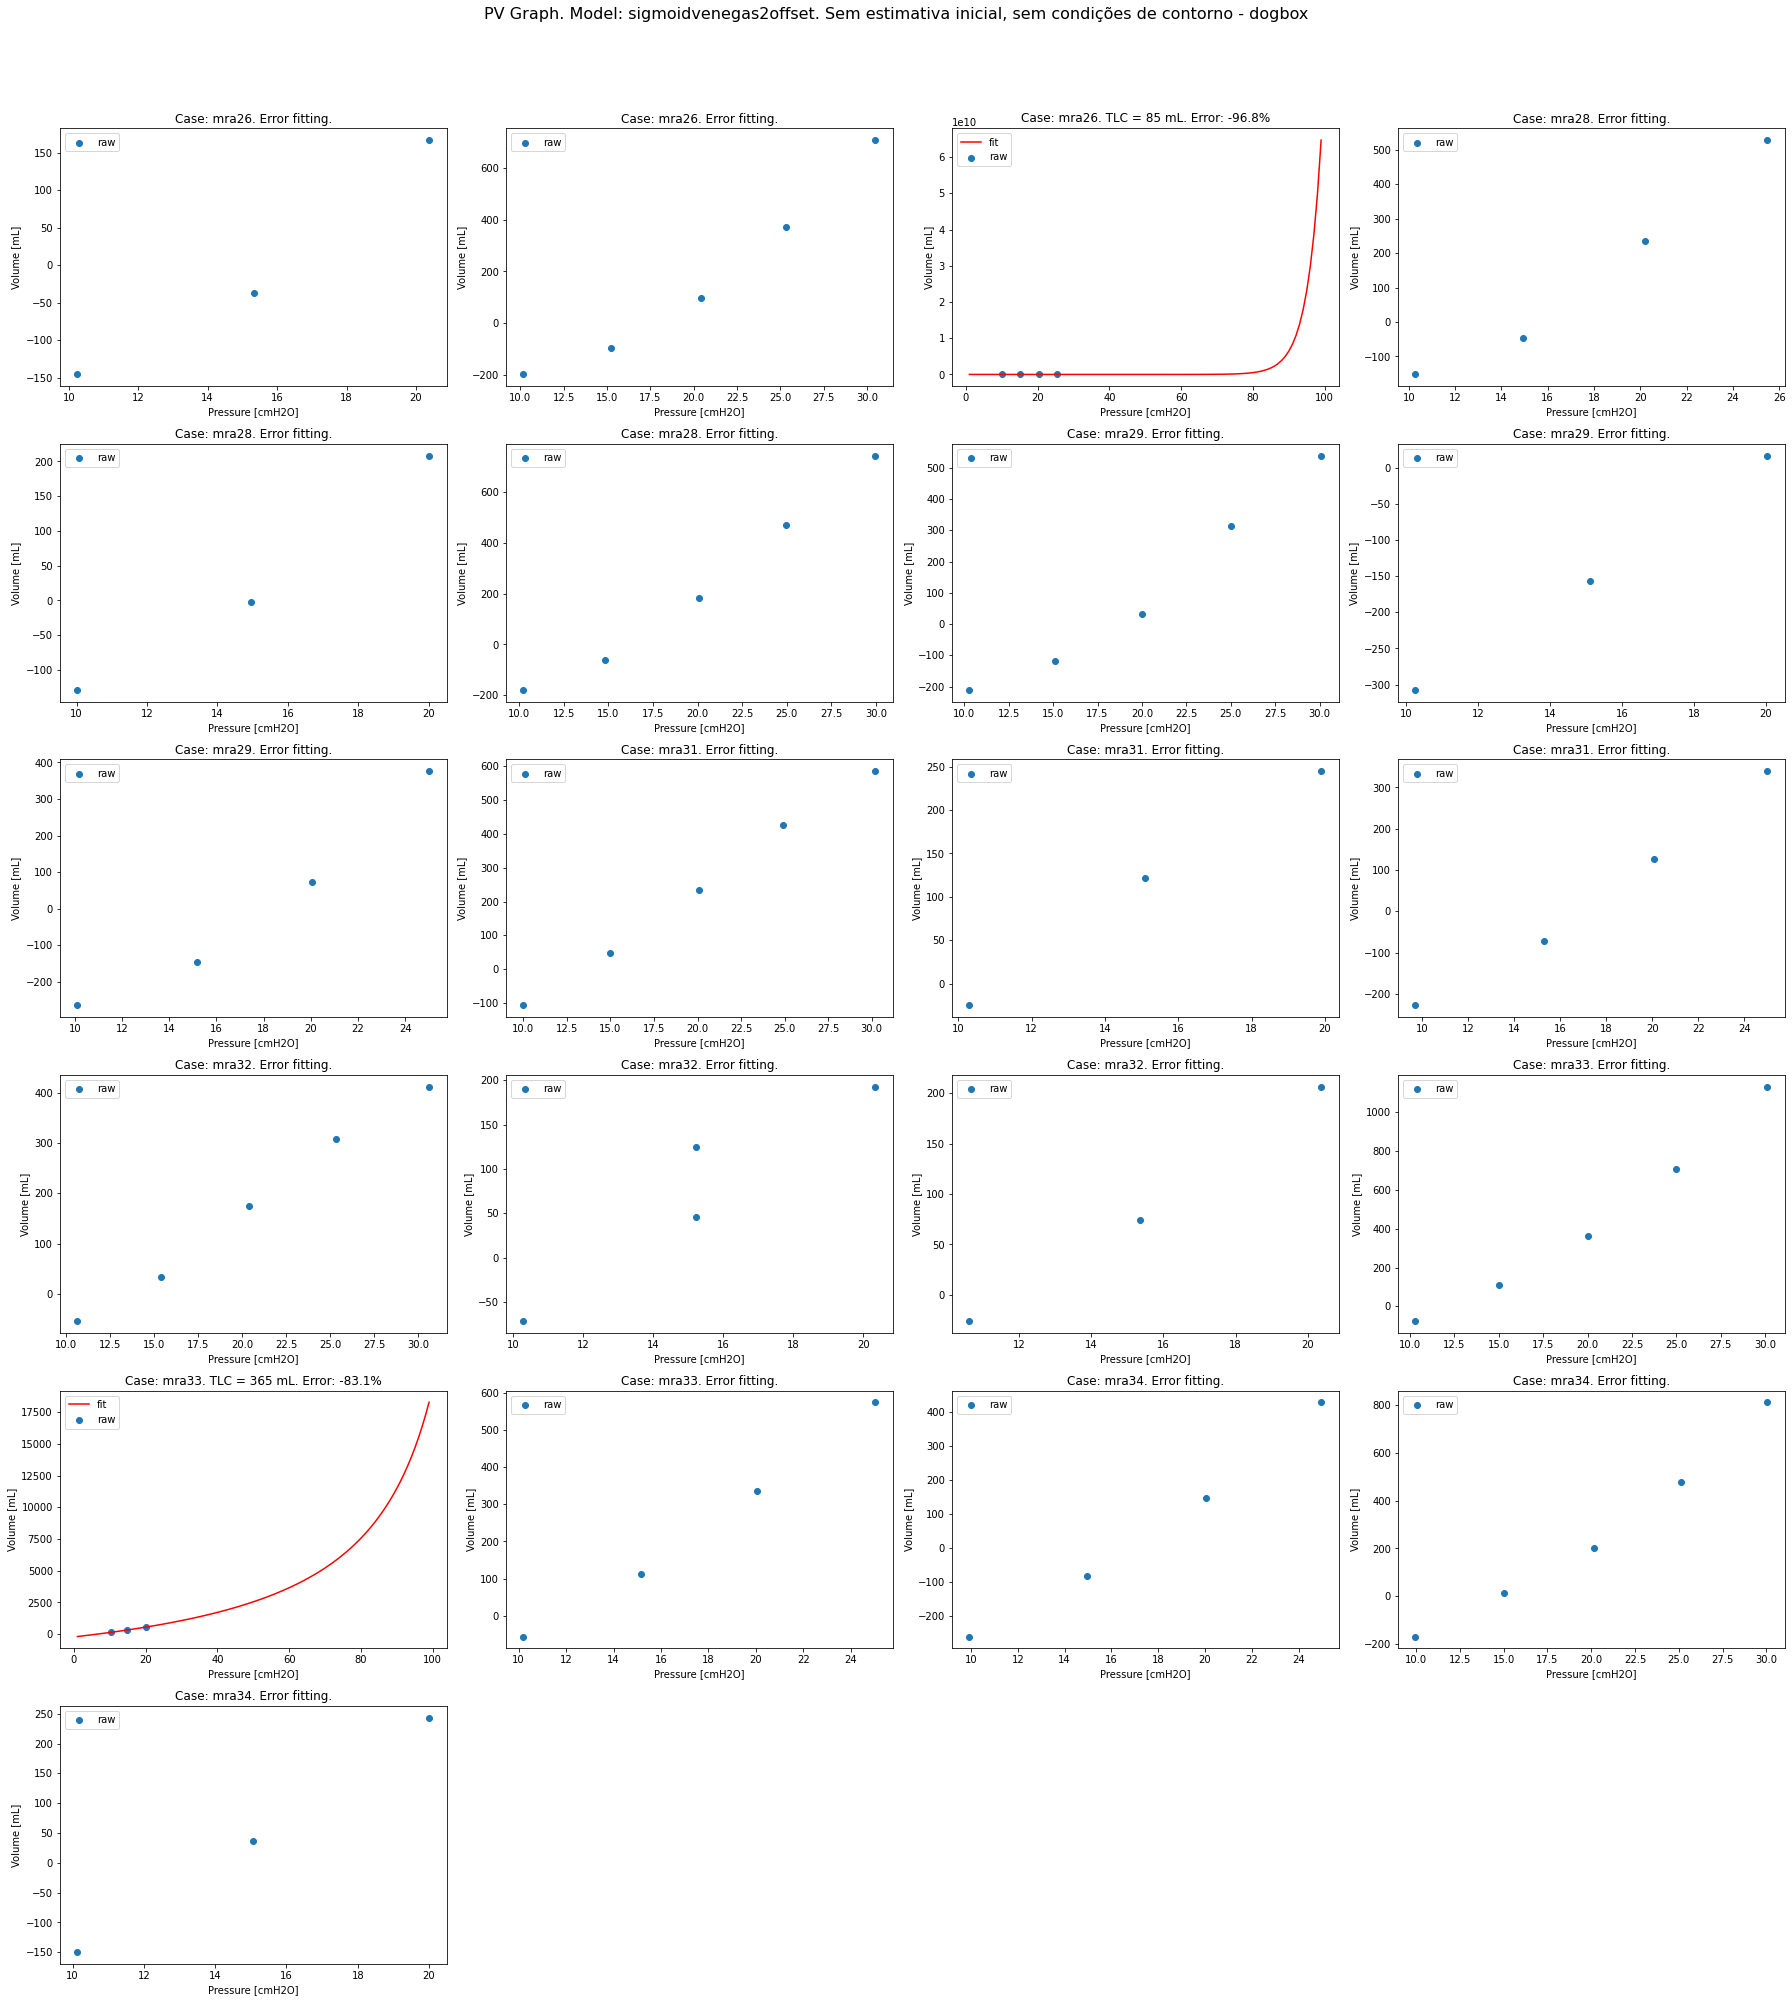

Norma(erro): 127.5. Erro médio: 89.91%. Ajustados: 2.


(127.51563118794097, 89.90637112802978, 2)

In [10]:
modelo = m.sigmoidvenegas2offset
metodo = 'dogbox'
texto = 'Sem estimativa inicial, sem condições de contorno - dogbox'
TLC_index = 0
m.testa_modelo(dadosdf, modelo, metodo=metodo, texto=texto, TLC_index=TLC_index)

#### Modelo sigmoidvenegas2offset - Sem estimativa inicial, sem condições de contorno.
#### Método trf

	Caso 0 (mra26) deu erro...
	Caso 1 (mra26) deu erro...
	Caso 2 (mra26) deu erro...
	Caso 3 (mra28) deu erro...
	Caso 4 (mra28) deu erro...
Testando caso 5: mra28: [  -46.2     1.0 0.874 0.894 -0.264   234.9 ]
	Caso 6 (mra29) deu erro...
	Caso 7 (mra29) deu erro...
	Caso 8 (mra29) deu erro...
Testando caso 9: mra31: [  110.1     1.0 0.903 0.887 -0.279   239.6 ]
	Caso 10 (mra31) deu erro...
	Caso 11 (mra31) deu erro...
	Caso 12 (mra32) deu erro...
Testando caso 13: mra32: [  -33.1 0.976     1.8    11.5   392.0 -9985.3 ]
	Caso 14 (mra32) deu erro...
	Caso 15 (mra33) deu erro...
	Caso 16 (mra33) deu erro...
	Caso 17 (mra33) deu erro...
	Caso 18 (mra34) deu erro...
	Caso 19 (mra34) deu erro...
	Caso 20 (mra34) deu erro...


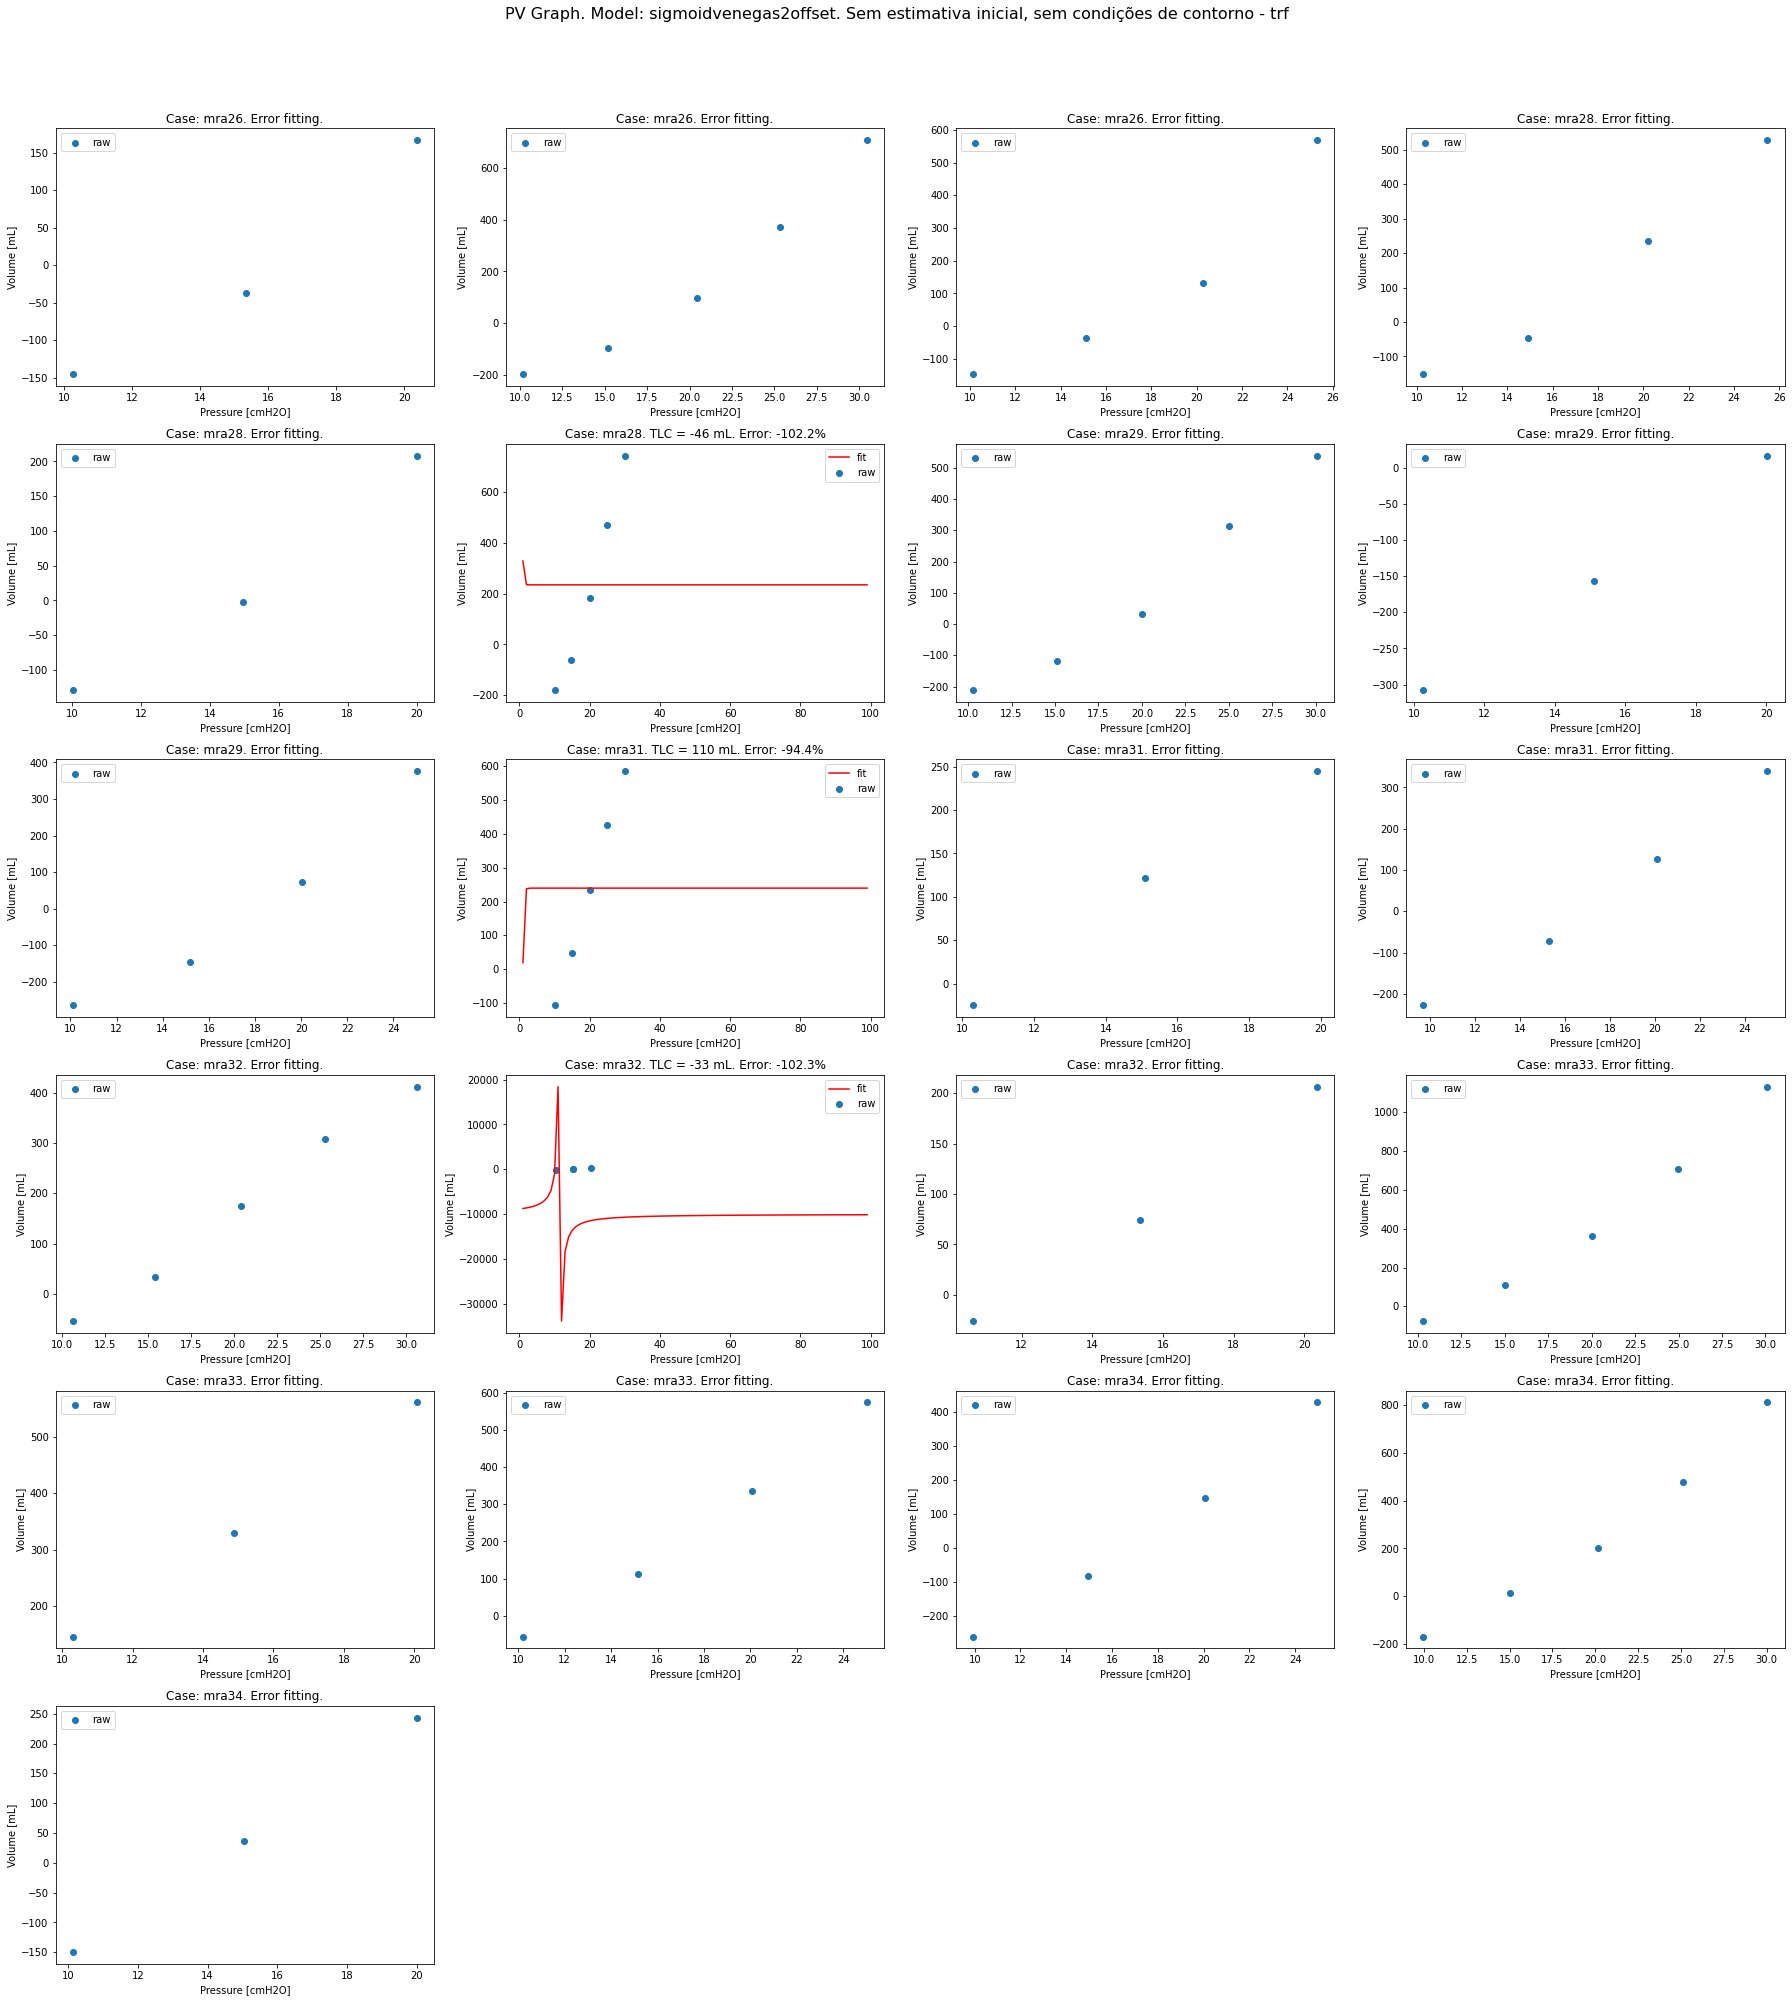

Norma(erro): 172.7. Erro médio: 99.64%. Ajustados: 3.


(172.69544027237404, 99.6375464315442, 3)

In [11]:
modelo = m.sigmoidvenegas2offset
metodo = 'trf'
texto = 'Sem estimativa inicial, sem condições de contorno - trf'
TLC_index = 0
m.testa_modelo(dadosdf, modelo, metodo=metodo, texto=texto, TLC_index=TLC_index)

#### Modelo sigmoidmurphy - Sem estimativa inicial, sem condições de contorno.
#### Método lm

In [4]:
modelo = m.sigmoidmurphy
metodo = 'lm'
texto = 'Sem estimativa inicial, sem condições de contorno - lm'
TLC_index = 0
invert_PV = True
m.testa_modelo(dadosdf, modelo, metodo=metodo, texto=texto, TLC_index=TLC_index, invert_PV=invert_PV)

NameError: name 'm' is not defined

#### Modelo sigmoidmurphy - Sem estimativa inicial, sem condições de contorno.
#### Método dogbox

	Caso 0 (mra26) deu erro...
	Caso 1 (mra26) deu erro...
Testando caso 2: mra26: [   36.2    36.2  -178.4  -177.0    18.4 ]
	Caso 3 (mra28) deu erro...
Testando caso 4: mra28: [ -671.1  -671.2  7064.9  7063.7    36.1 ]
	Caso 5 (mra28) deu erro...
	Caso 6 (mra29) deu erro...
	Caso 7 (mra29) deu erro...
	Caso 8 (mra29) deu erro...
	Caso 9 (mra31) deu erro...
	Caso 10 (mra31) deu erro...
	Caso 11 (mra31) deu erro...
	Caso 12 (mra32) deu erro...
Testando caso 13: mra32: [  122.8   -71.5    -3.7 -0.001    13.0 ]
	Caso 14 (mra32) deu erro...
	Caso 15 (mra33) deu erro...
	Caso 16 (mra33) deu erro...
Testando caso 17: mra33: [-1104.1   744.6 36191.8   398.3    44.2 ]
	Caso 18 (mra34) deu erro...
	Caso 19 (mra34) deu erro...
	Caso 20 (mra34) deu erro...


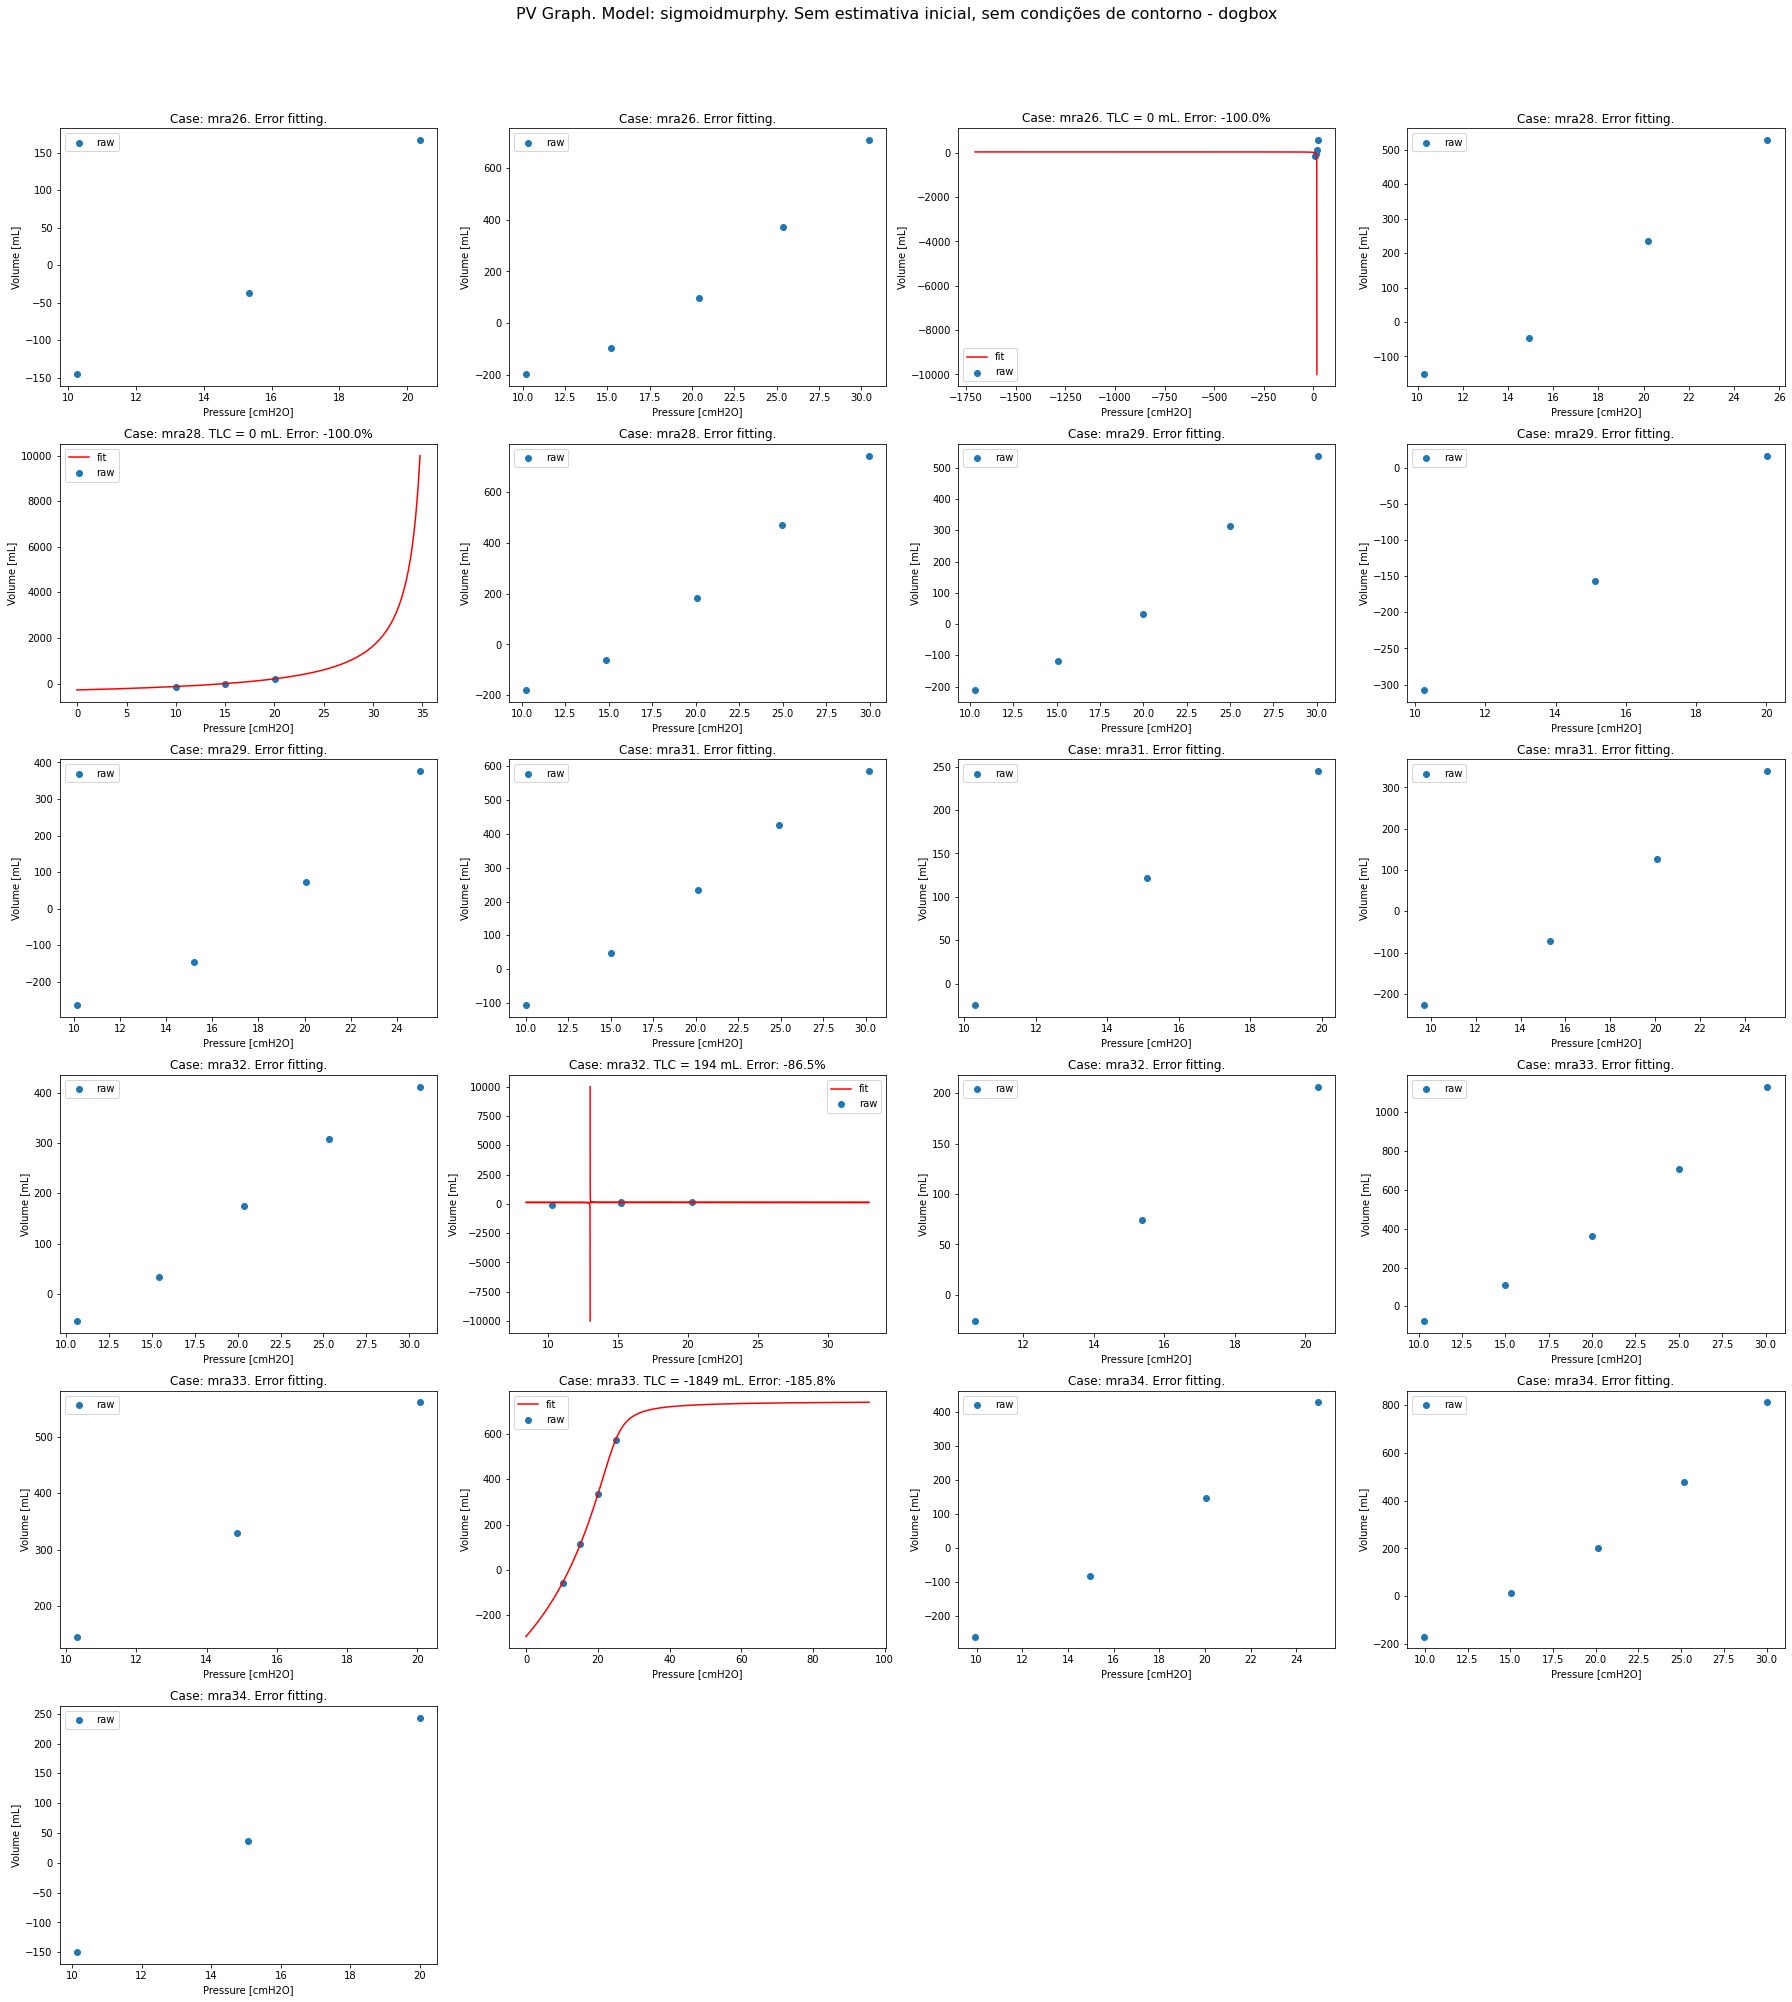

Norma(erro): 249.0. Erro médio: 118.08%. Ajustados: 4.


(249.00877312768569, 118.07662688358764, 4)

In [36]:
modelo = m.sigmoidmurphy
metodo = 'dogbox'
texto = 'Sem estimativa inicial, sem condições de contorno - dogbox'
TLC_index = 0
invert_PV = True
m.testa_modelo(dadosdf, modelo, metodo=metodo, texto=texto, TLC_index=TLC_index, invert_PV=invert_PV)

#### Modelo sigmoidmurphy - Sem estimativa inicial, sem condições de contorno.
#### Método trf

	Caso 0 (mra26) deu erro...
Testando caso 1: mra26: [  -36.5   -36.5  -230.8  -236.2    21.4 ]
Testando caso 2: mra26: [   36.2    36.2  -176.4  -179.0    18.4 ]
Testando caso 3: mra28: [   92.9    92.9  -330.0  -330.0    18.5 ]
Testando caso 4: mra28: [ -668.1  -674.3  7064.7  7064.7    36.1 ]
Testando caso 5: mra28: [   25.9    25.9  -296.2  -296.2    21.1 ]
Testando caso 6: mra29: [  -66.9   -66.8  -191.6  -191.6    21.3 ]
	Caso 7 (mra29) deu erro...
Testando caso 8: mra29: [  -52.5   -52.5  -257.3  -257.3    18.2 ]
	Caso 9 (mra31) deu erro...
	Caso 10 (mra31) deu erro...
Testando caso 11: mra31: [ -658.0   873.5  7764.7  5194.6    23.1 ]
	Caso 12 (mra32) deu erro...
Testando caso 13: mra32: [-4284.8  2100.4 130701.1 77075.0     5.8 ]
	Caso 14 (mra32) deu erro...
	Caso 15 (mra33) deu erro...
	Caso 16 (mra33) deu erro...
	Caso 17 (mra33) deu erro...
Testando caso 18: mra34: [   23.3    23.3  -252.8  -252.8    17.7 ]
	Caso 19 (mra34) deu erro...
	Caso 20 (mra34) deu erro...


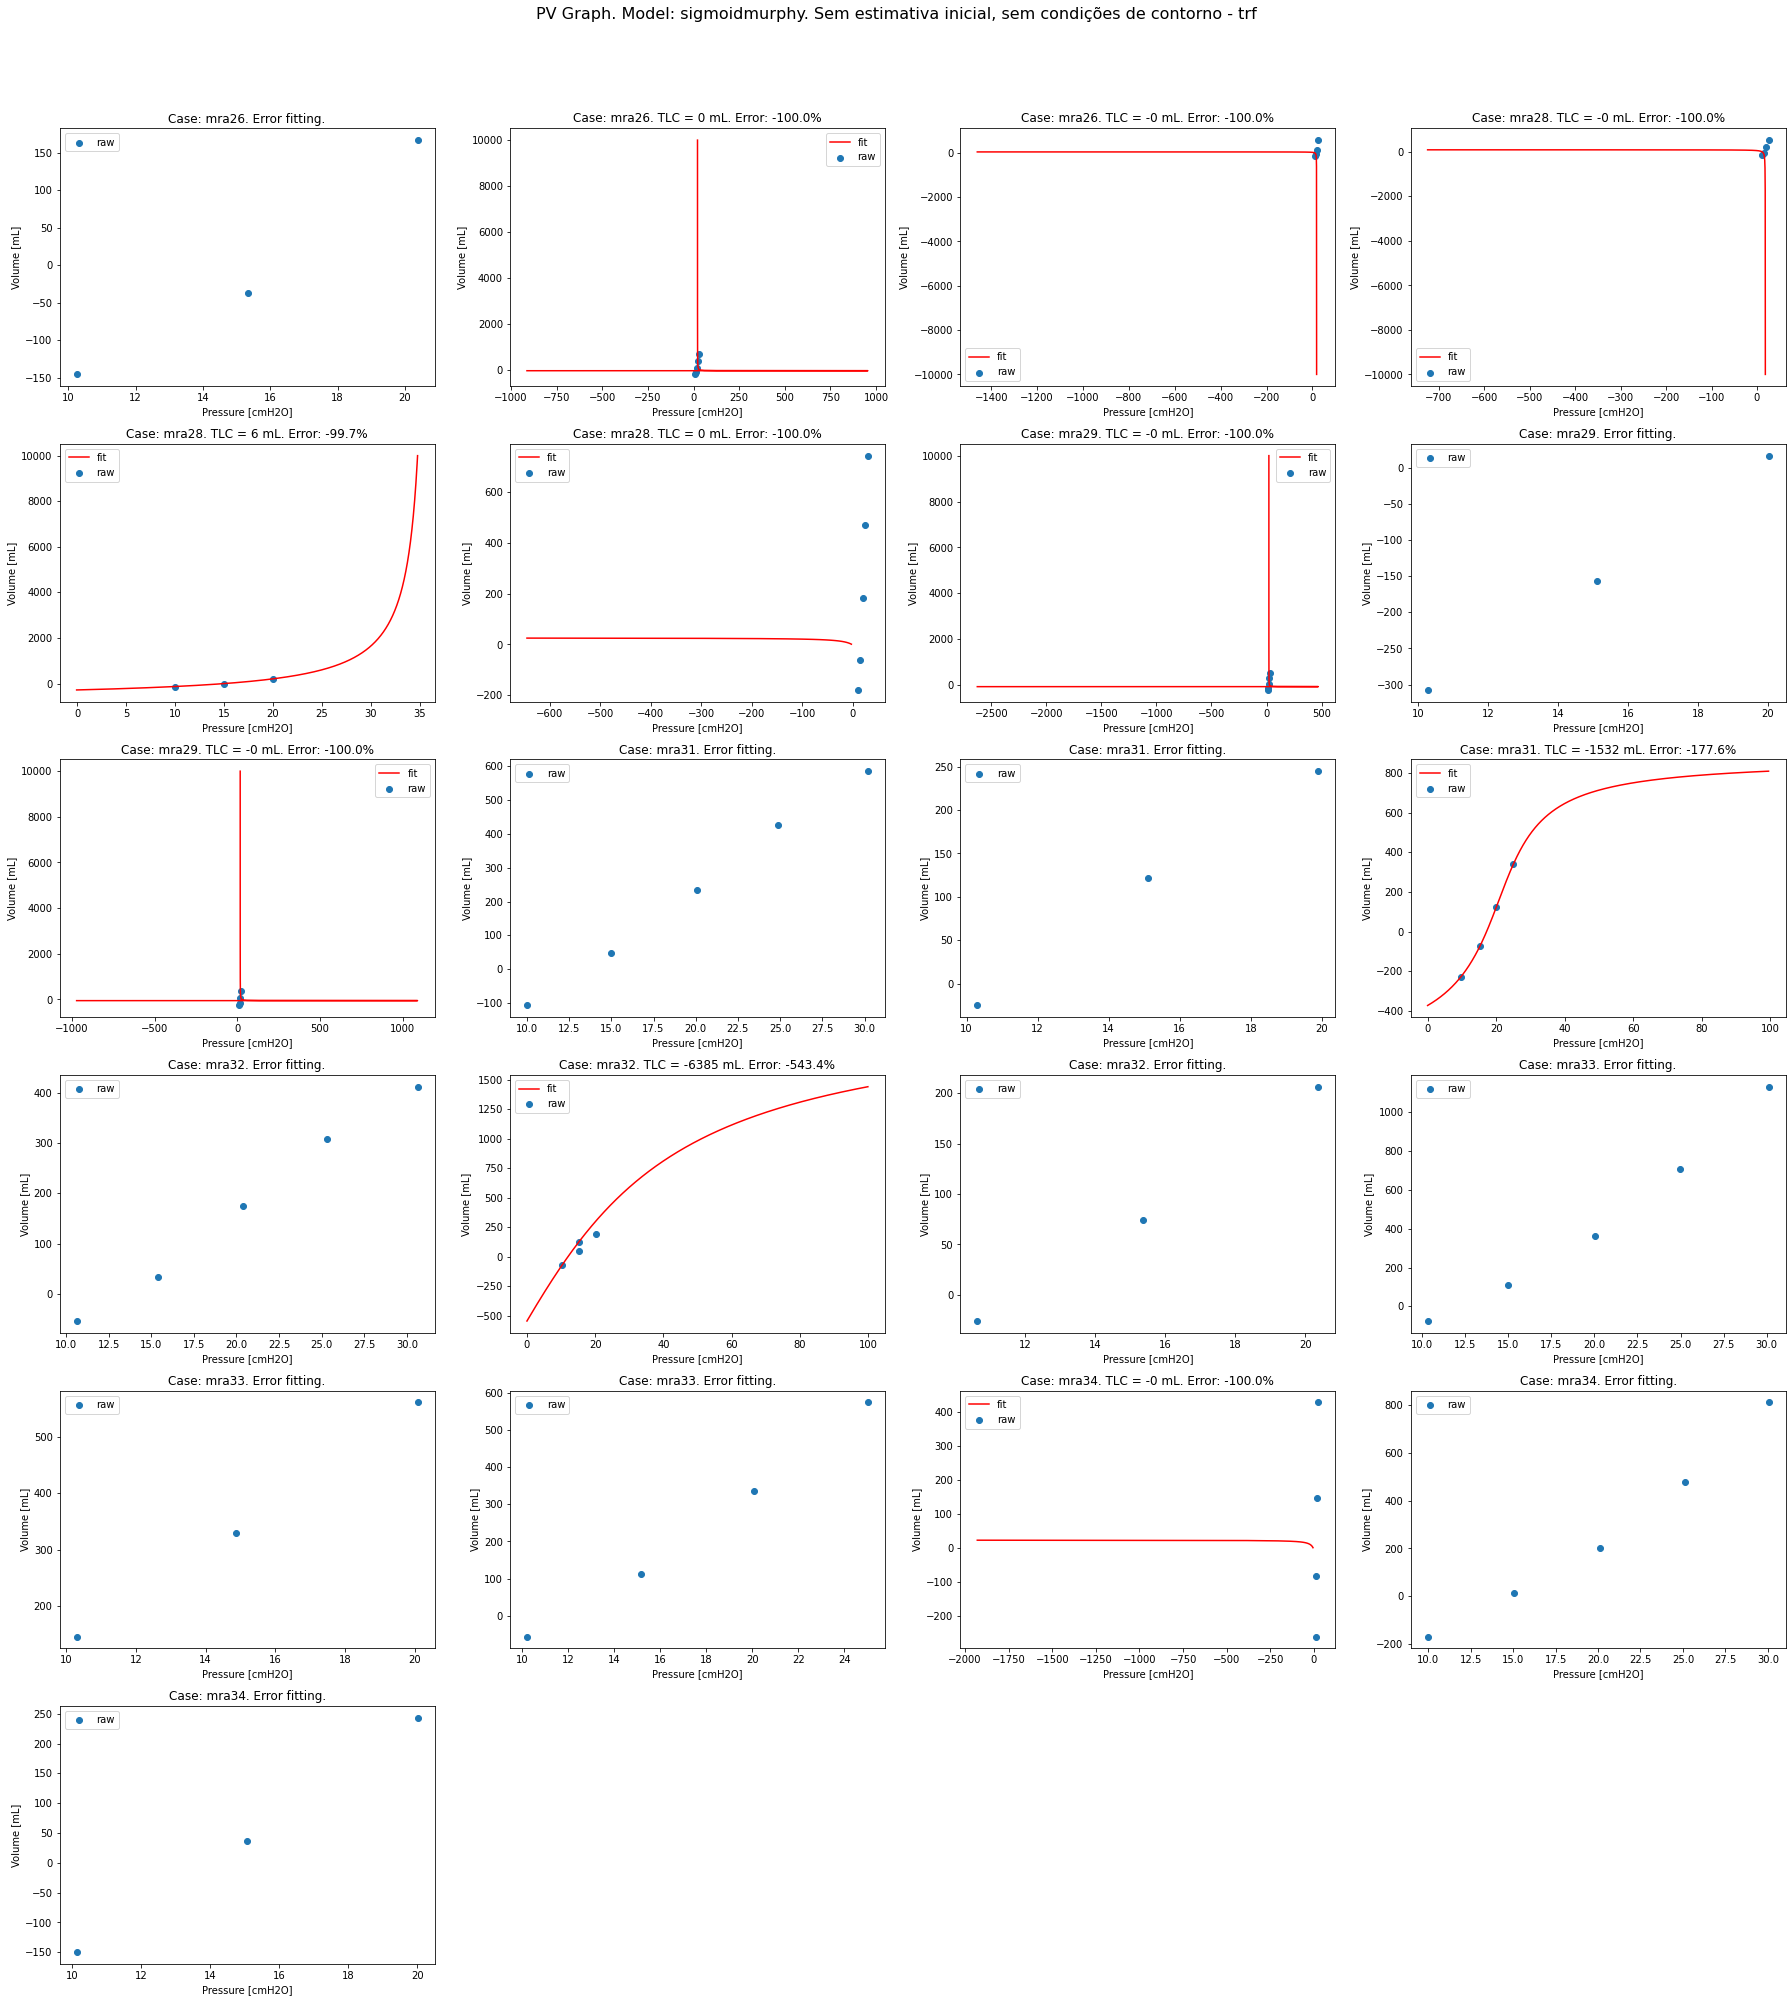

Norma(erro): 637.7. Erro médio: 152.06%. Ajustados: 10.


(637.7362088268158, 152.06318536874738, 10)

In [37]:
modelo = m.sigmoidmurphy
metodo = 'trf'
texto = 'Sem estimativa inicial, sem condições de contorno - trf'
TLC_index = 0
invert_PV = True
m.testa_modelo(dadosdf, modelo, metodo=metodo, texto=texto, TLC_index=TLC_index, invert_PV=invert_PV)

#### Modelo sigmoid_recruit_units - Sem estimativa inicial, sem condições de contorno.
#### Método lm

	Caso 0 (mra26) deu erro...
	Caso 1 (mra26) deu erro...
	Caso 2 (mra26) deu erro...
	Caso 3 (mra28) deu erro...
	Caso 4 (mra28) deu erro...
	Caso 5 (mra28) deu erro...
	Caso 6 (mra29) deu erro...
	Caso 7 (mra29) deu erro...
	Caso 8 (mra29) deu erro...
	Caso 9 (mra31) deu erro...
	Caso 10 (mra31) deu erro...
	Caso 11 (mra31) deu erro...
	Caso 12 (mra32) deu erro...
	Caso 13 (mra32) deu erro...
	Caso 14 (mra32) deu erro...
	Caso 15 (mra33) deu erro...
	Caso 16 (mra33) deu erro...
	Caso 17 (mra33) deu erro...
	Caso 18 (mra34) deu erro...
	Caso 19 (mra34) deu erro...
	Caso 20 (mra34) deu erro...


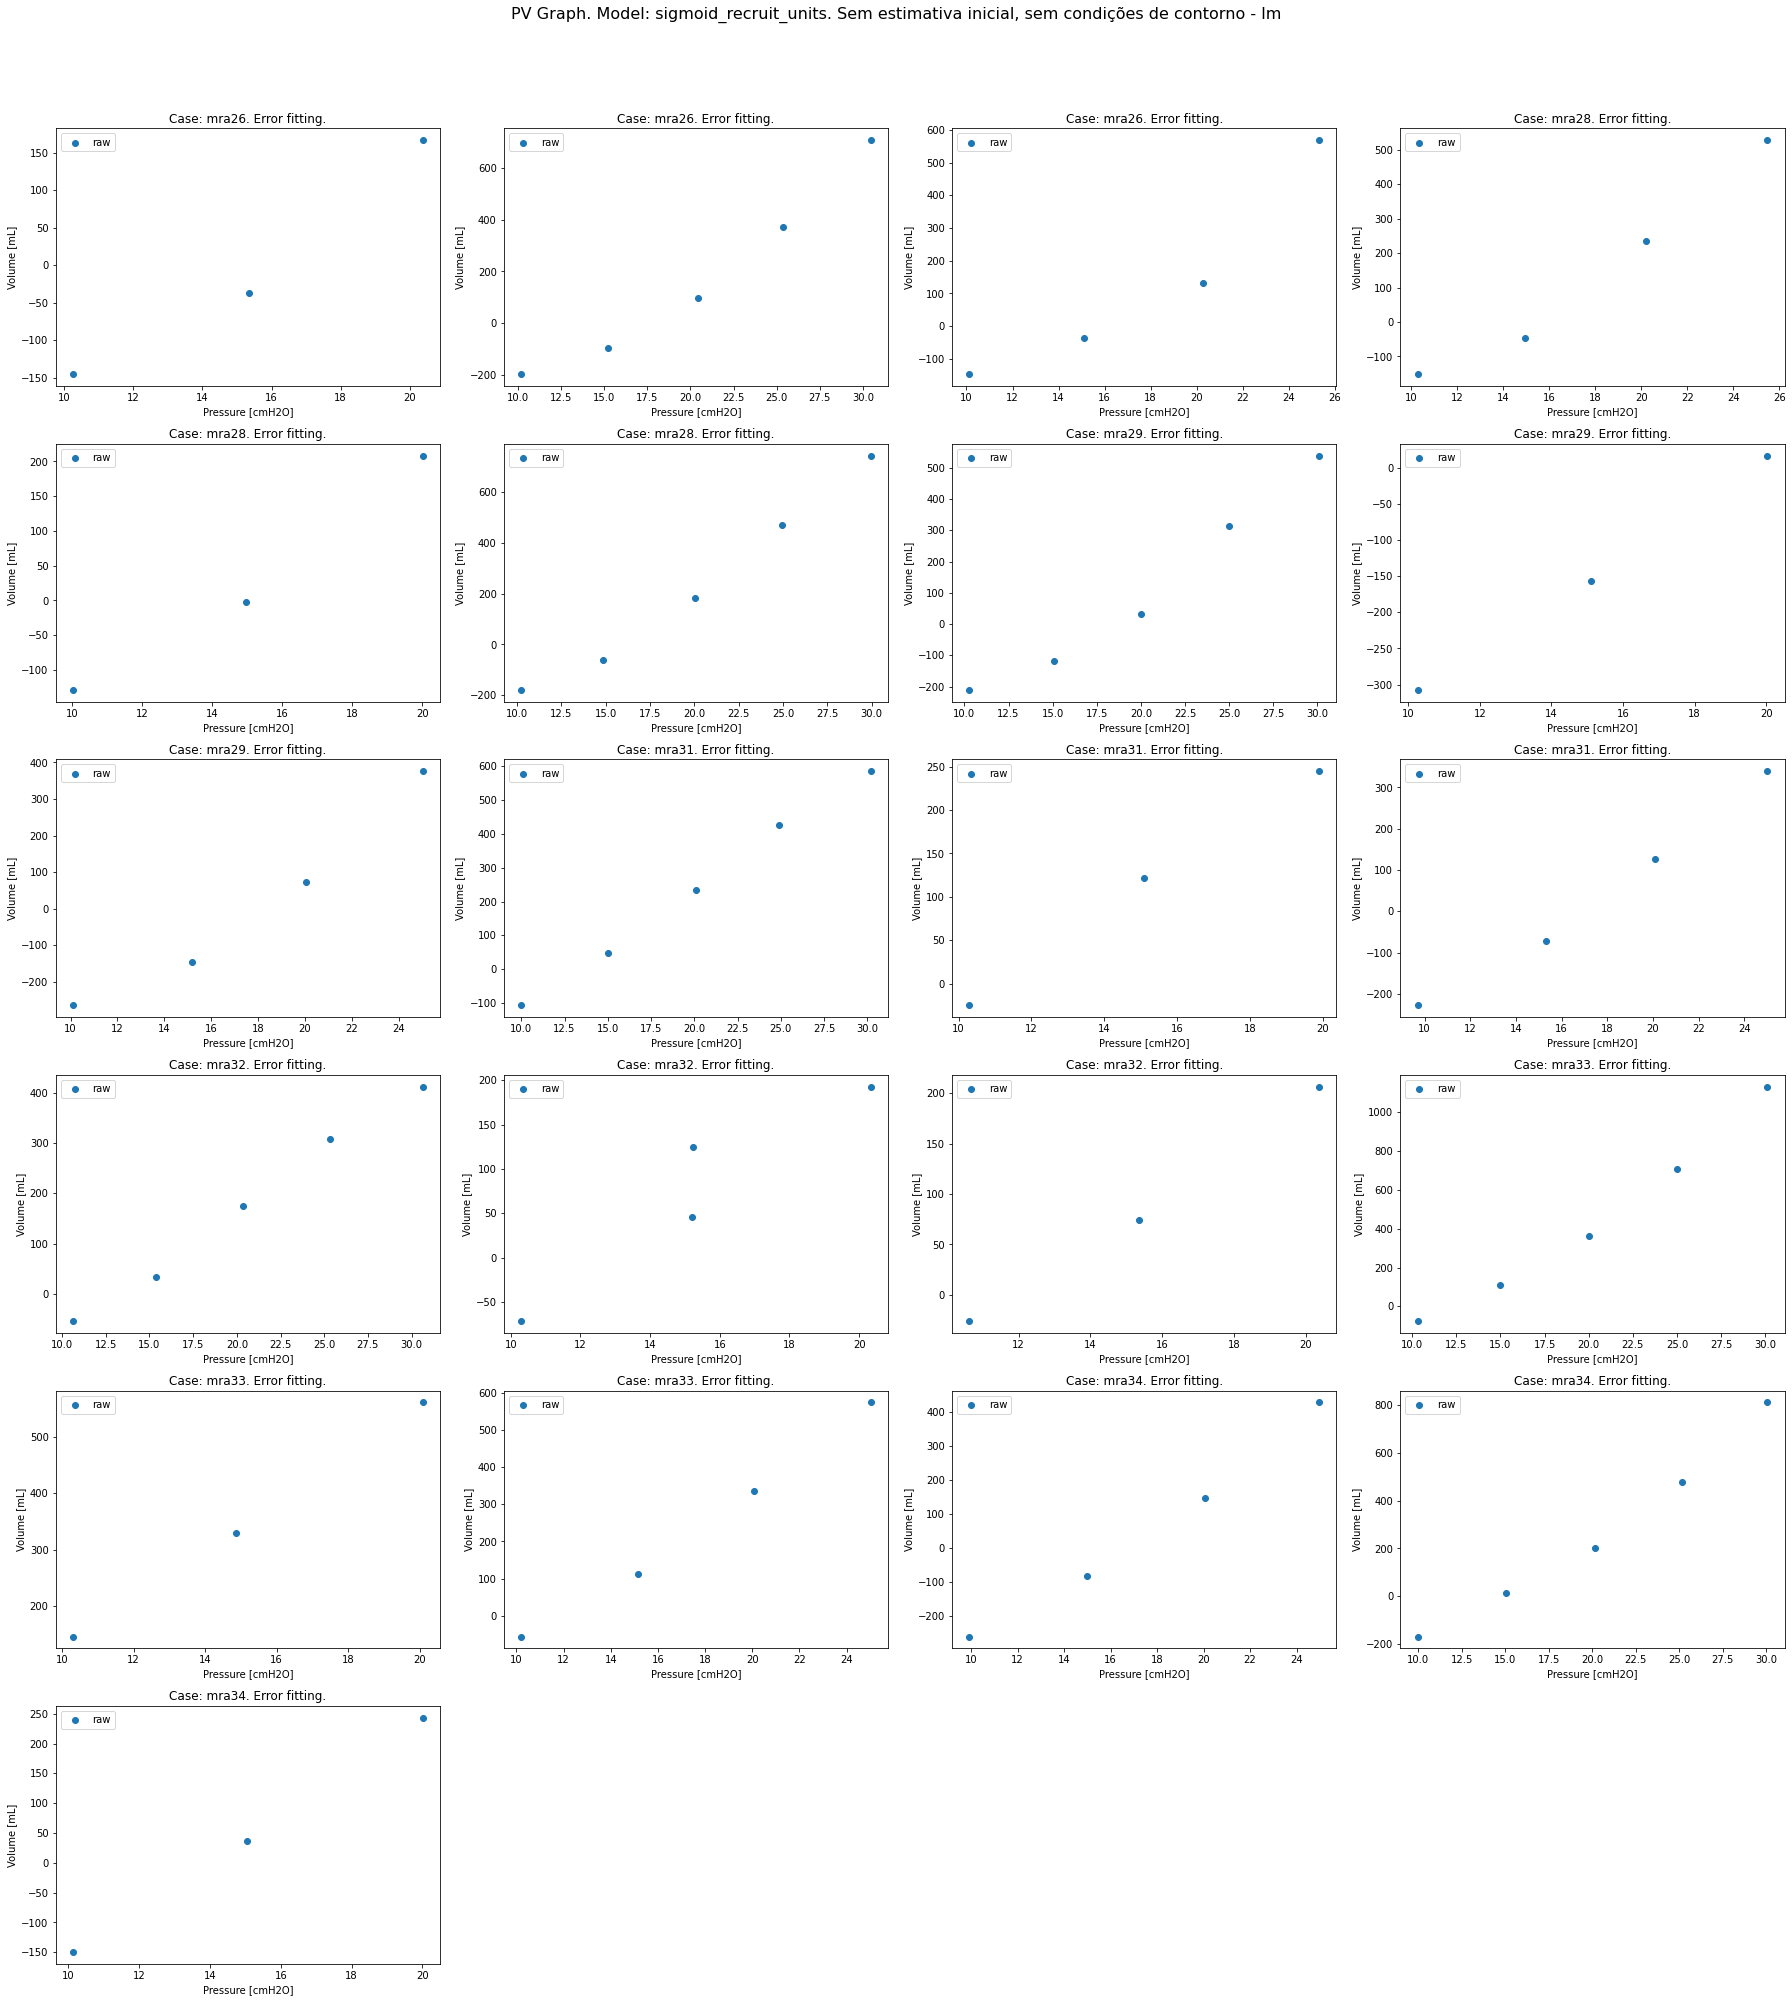

Norma(erro): -1.0. Erro médio: -1.00%. Ajustados: 0.


(-1, -1, 0)

In [44]:
modelo = m.sigmoid_recruit_units
metodo = 'lm'
texto = 'Sem estimativa inicial, sem condições de contorno - lm'
TLC_index = 1
m.testa_modelo(dadosdf, modelo, metodo=metodo, texto=texto, TLC_index=TLC_index)

#### Modelo sigmoid_recruit_units - Sem estimativa inicial, sem condições de contorno.
#### Método dogbox

Testando caso 0: mra26: [    1.7    -6.4 1.000 1.000 0.675 ]
	Caso 1 (mra26) deu erro...
	Caso 2 (mra26) deu erro...
	Caso 3 (mra28) deu erro...
	Caso 4 (mra28) deu erro...
	Caso 5 (mra28) deu erro...
	Caso 6 (mra29) deu erro...
Testando caso 7: mra29: [    9.4  -126.0 1.000 1.000   -22.7 ]
	Caso 8 (mra29) deu erro...
	Caso 9 (mra31) deu erro...
	Caso 10 (mra31) deu erro...
	Caso 11 (mra31) deu erro...
	Caso 12 (mra32) deu erro...
Testando caso 13: mra32: [   16.7 -8155.3 1.000 1.000 -8155.3 ]
	Caso 14 (mra32) deu erro...
	Caso 15 (mra33) deu erro...
	Caso 16 (mra33) deu erro...
	Caso 17 (mra33) deu erro...
	Caso 18 (mra34) deu erro...
	Caso 19 (mra34) deu erro...
	Caso 20 (mra34) deu erro...


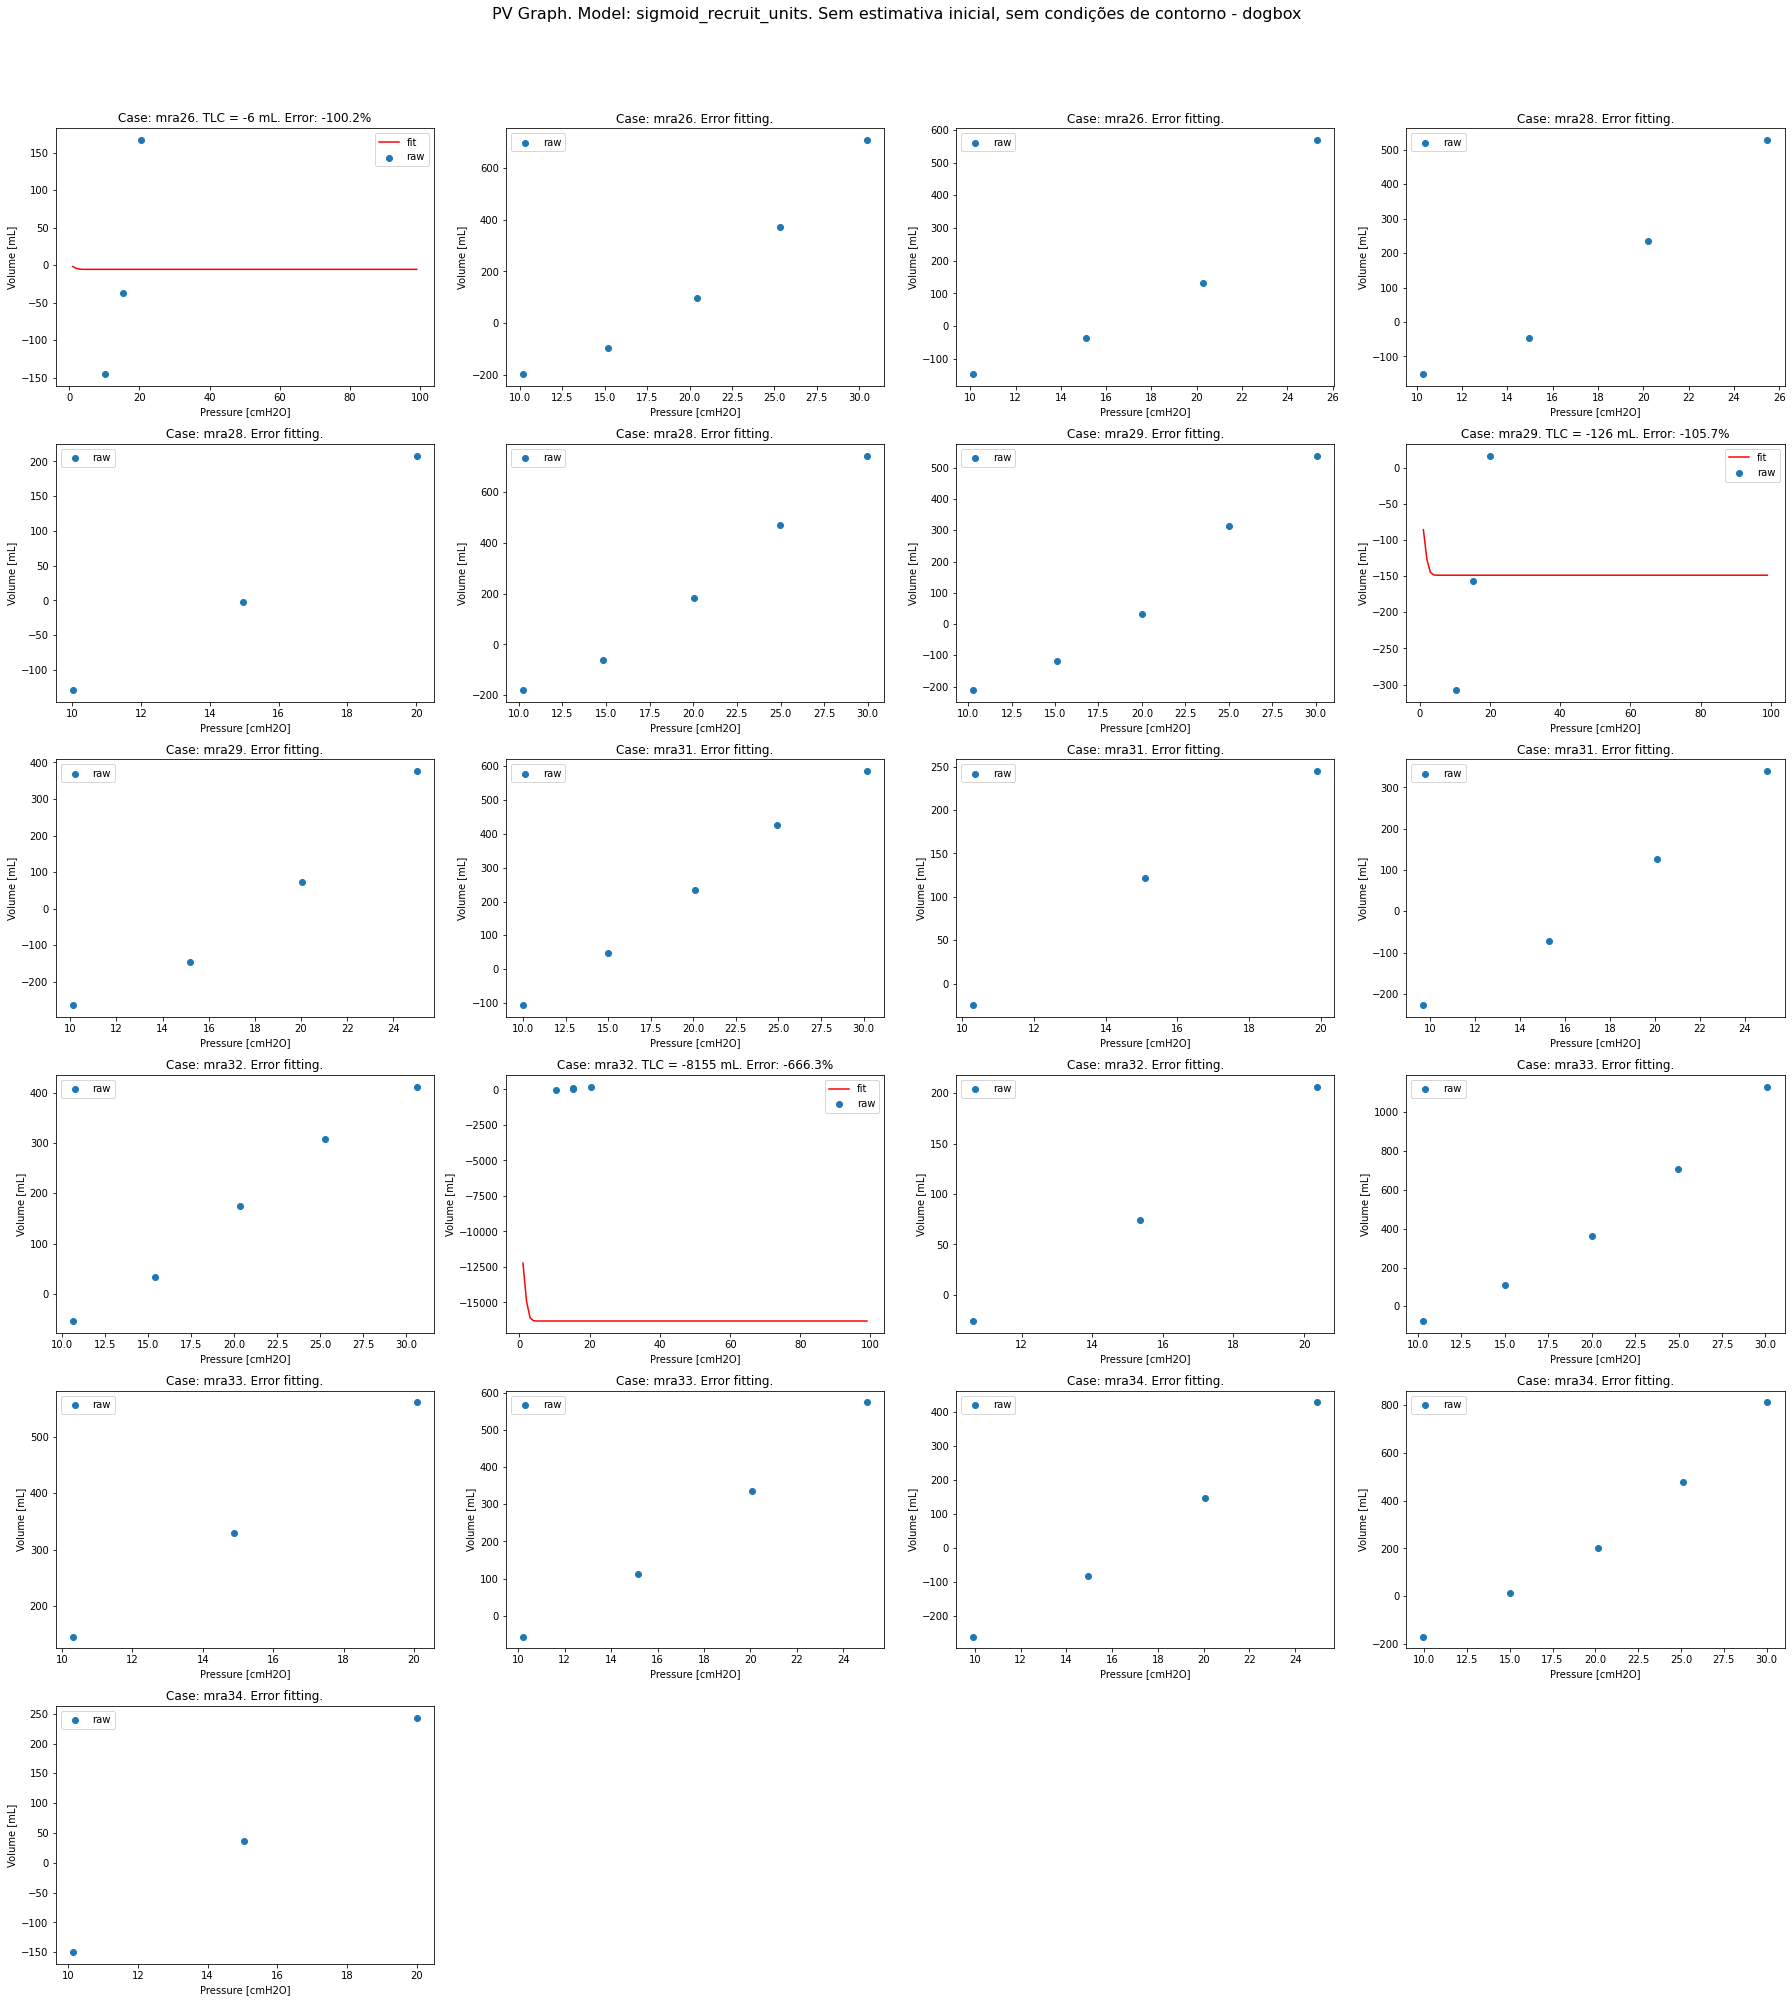

Norma(erro): 682.0. Erro médio: 290.74%. Ajustados: 3.


(682.0030857180162, 290.73882092698875, 3)

In [43]:
modelo = m.sigmoid_recruit_units
metodo = 'dogbox'
texto = 'Sem estimativa inicial, sem condições de contorno - dogbox'
TLC_index = 1
m.testa_modelo(dadosdf, modelo, metodo=metodo, texto=texto, TLC_index=TLC_index)

#### Modelo sigmoid_recruit_units - Sem estimativa inicial, sem condições de contorno.
#### Método trf

Testando caso 0: mra26: [    4.1    -8.9 1.000 1.000     3.2 ]
	Caso 1 (mra26) deu erro...
	Caso 2 (mra26) deu erro...
	Caso 3 (mra28) deu erro...
	Caso 4 (mra28) deu erro...
	Caso 5 (mra28) deu erro...
	Caso 6 (mra29) deu erro...
Testando caso 7: mra29: [  198.0   -42.1 1.000 1.000  -106.6 ]
	Caso 8 (mra29) deu erro...
	Caso 9 (mra31) deu erro...
	Caso 10 (mra31) deu erro...
	Caso 11 (mra31) deu erro...
	Caso 12 (mra32) deu erro...
Testando caso 13: mra32: [ 1008.0 -5512.8 1.000 1.000 -10797.8 ]
	Caso 14 (mra32) deu erro...
	Caso 15 (mra33) deu erro...
	Caso 16 (mra33) deu erro...
	Caso 17 (mra33) deu erro...
	Caso 18 (mra34) deu erro...
	Caso 19 (mra34) deu erro...
	Caso 20 (mra34) deu erro...


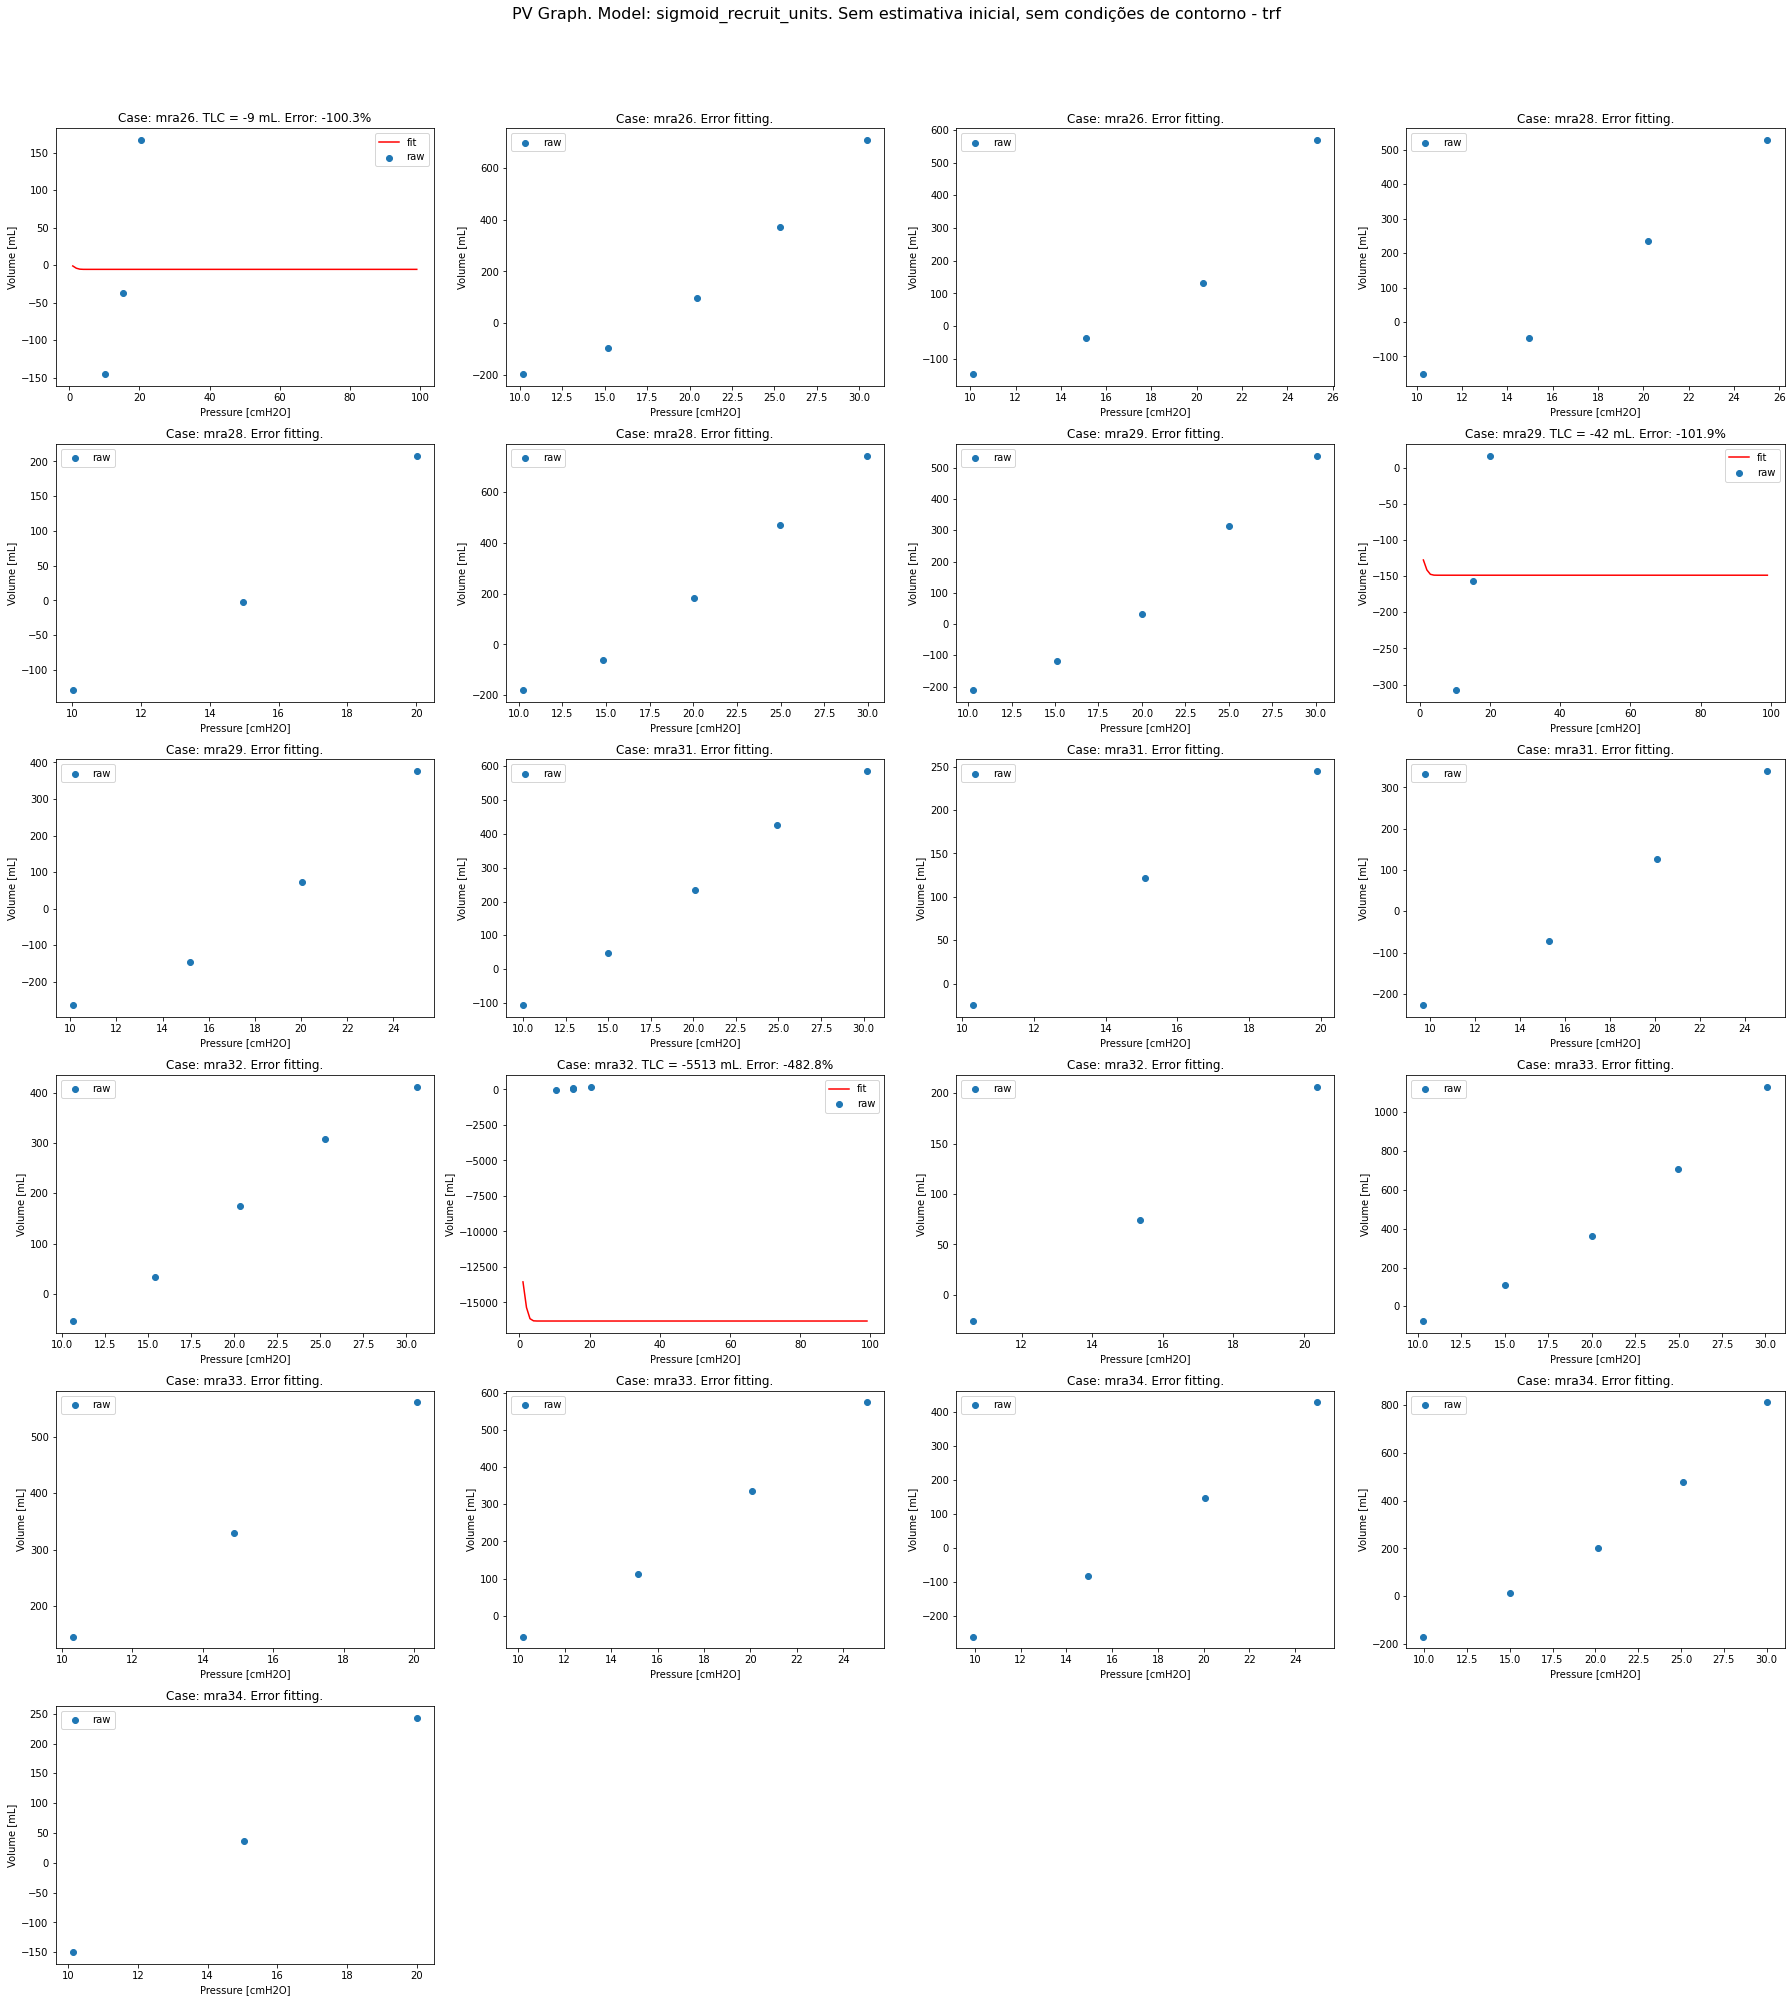

Norma(erro): 503.5. Erro médio: 228.34%. Ajustados: 3.


(503.5209431059813, 228.34441296888318, 3)

In [42]:
modelo = m.sigmoid_recruit_units
metodo = 'trf'
texto = 'Sem estimativa inicial, sem condições de contorno - trf'
TLC_index = 1
m.testa_modelo(dadosdf, modelo, metodo=metodo, texto=texto, TLC_index=TLC_index)